# Stock Market Analysis using Fbprophet, AutoArima and LSTM

<img src="https://github.com/user-attachments/assets/08b84f54-14e2-4d2b-b0c0-4e93fc5aacc9" alt="image" width="800"/>

Time series data consists of data points indexed in chronological order. This type of data is ubiquitous, making its manipulation crucial for data analysts and data scientists.

In this notebook, we will delve into stock market data, focusing on technology giants such as Apple, Amazon, Google, and Microsoft. We will utilize the yfinance library to fetch stock information and employ Seaborn and Matplotlib for visualization. Additionally, we will analyze stock risk based on historical performance and predict future stock prices using Long Short Term Memory (LSTM) networks.

Throughout this notebook, we will address the following questions:

1) How has the stock price changed over time?
2) What is the average daily return of the stock?
3) What are the moving averages of the various stocks?
4) What is the correlation between different stocks?
5) What is the value at risk when investing in a particular stock?
6) How can we predict future stock behavio using Auto Arima?
7) How can we predict future stock behavio using Fbprophet?
8) How can we predict future stock behavio using LSTM? (<b>best performer</b>)

***   

## Getting the Data
The first step is to get the data and load it to memory. We will get our stock data from the Yahoo Finance website. Yahoo Finance is a rich resource of financial market data and tools to find compelling investments. To get the data from Yahoo Finance, we will be using yfinance library which offers a threaded and Pythonic way to download market data from Yahoo.

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [ ]:
!pip install -q yfinance

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

# yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-09-12  184.800003  187.410004  183.539993  187.000000  187.000000   
2024-09-13  187.000000  188.500000  185.910004  186.490005  186.490005   
2024-09-16  185.289993  185.809998  183.360001  184.889999  184.889999   
2024-09-17  186.850006  189.449997  186.139999  186.880005  186.880005   
2024-09-18  186.449997  188.800003  185.059998  186.429993  186.429993   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   
2024-09-23  191.639999  194.449997  190.570007  193.880005  193.880005   
2024-09-24  194.270004  195.369995  190.130005  193.960007  193.960007   
2024-09-25  193.750000  193.949997  192.160004  192.529999  192.529999   

               Volume company_name  
Date                                
2024-09-12   33622500       AMAZON  
2024-09-13   26495400       AMAZON  
2024-09-16   26065500       AMAZON  
2024-09-17   26091700       AMAZON  
2024-09-18   34448100       AMAZON  
2024-09-19   39543200       AMAZON  
2024-09-20  100378600       AMAZON  
2024-09-23   36993100       AMAZON  
2024-09-24   43478900       AMAZON  
2024-09-25   26300100       AMAZON

Reviewing the content of our data, we can see that the data is numeric and the date is the index of the data. Notice also that weekends are missing from the records.

**Quick note:** Using `globals()` is a sloppy way of setting the `DataFrame` names, but it's simple. Now we have our data, let's perform some basic data analysis and check our data.

## Descriptive Statistics about the Data
`.describe()` generates descriptive statistics. Descriptive statistics include those that summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding `NaN` values.

Analyzes both numeric and object series, as well as `DataFrame` column sets of mixed data types. The output will vary depending on what is provided. Refer to the notes below for more detail.

In [ ]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   193.316111  195.112976  191.666984  193.495794  193.034738   
std     19.803061   20.049630   19.371231   19.732710   19.920896   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    176.122494  178.267502  175.105000  177.405003  176.501823   
50%    189.540001  190.659996  188.114998  189.559998  188.843391   
75%    212.352505  215.312500  210.385002  213.115005  212.868614   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.520000e+02  
mean   5.970262e+07  
std    2.960406e+07  
min    2.404830e+07  
25%    4.484410e+07  
50%    5.300555e+07  
75%    6.547662e+07  
max    3.186799e+08

We have only 255 records in one year because weekends are not included in the data.

## Information About the Data
`.info()` method prints information about a DataFrame including the index `dtype` and columns, non-null values, and memory usage.

In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-09-26 to 2024-09-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

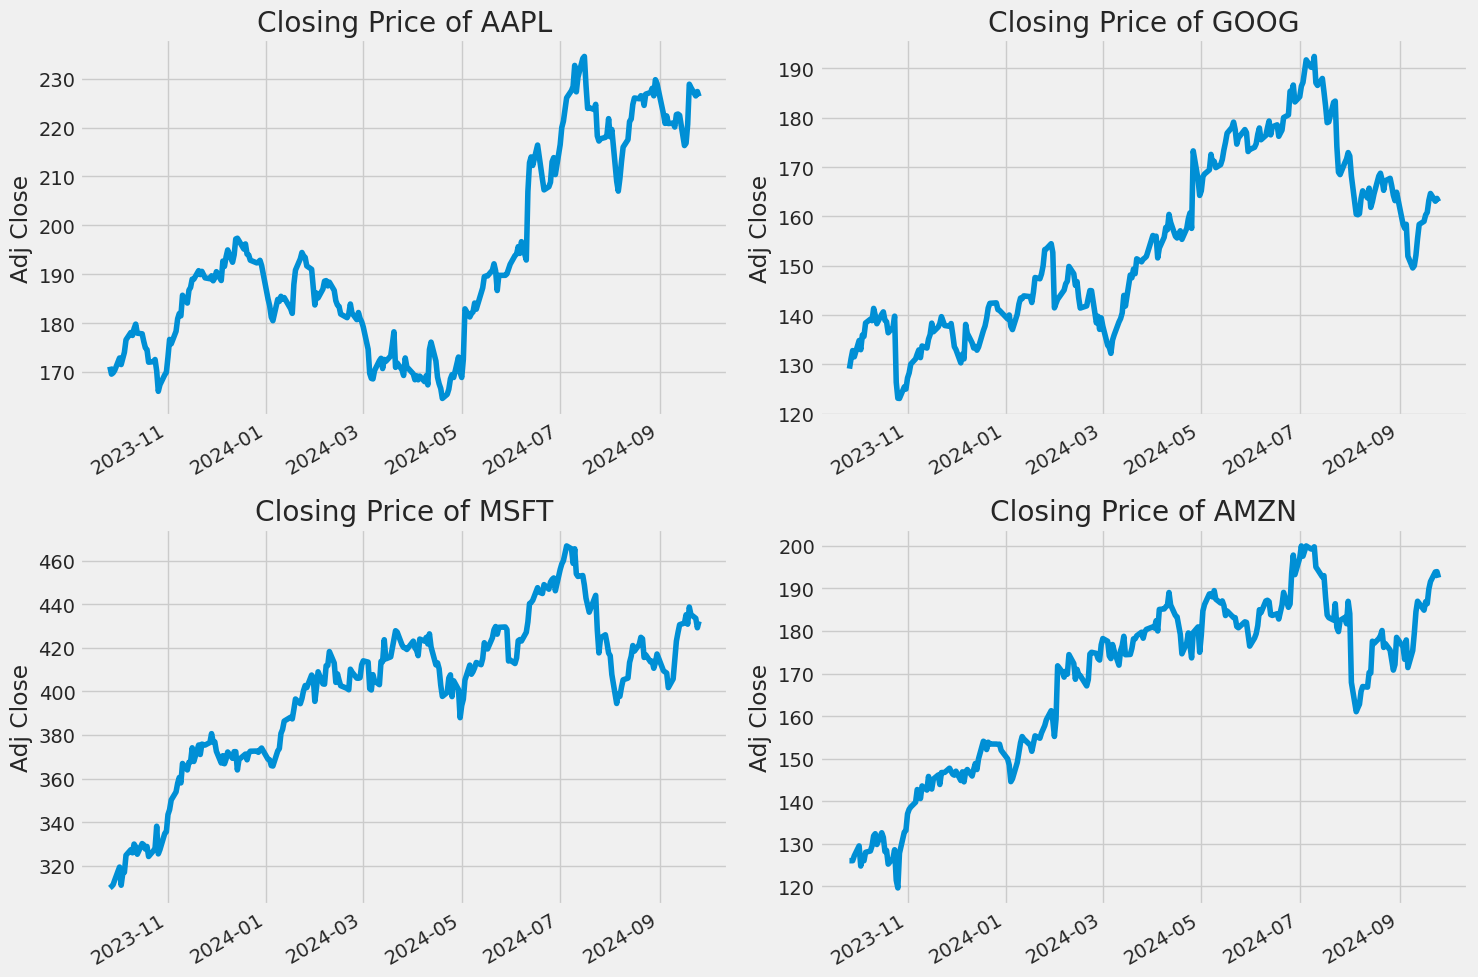

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

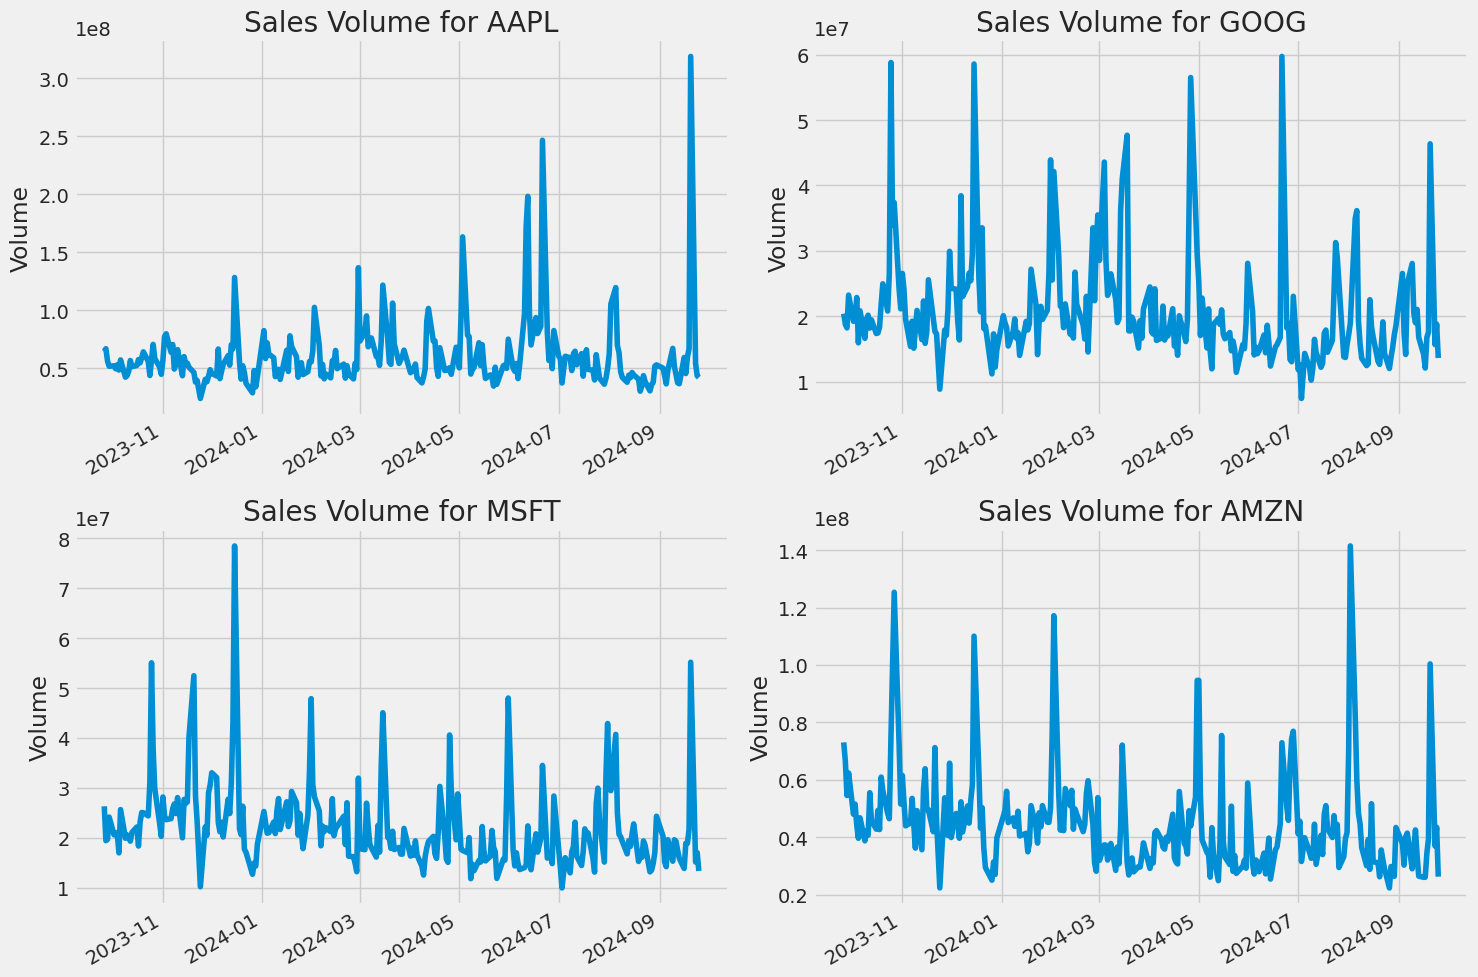

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

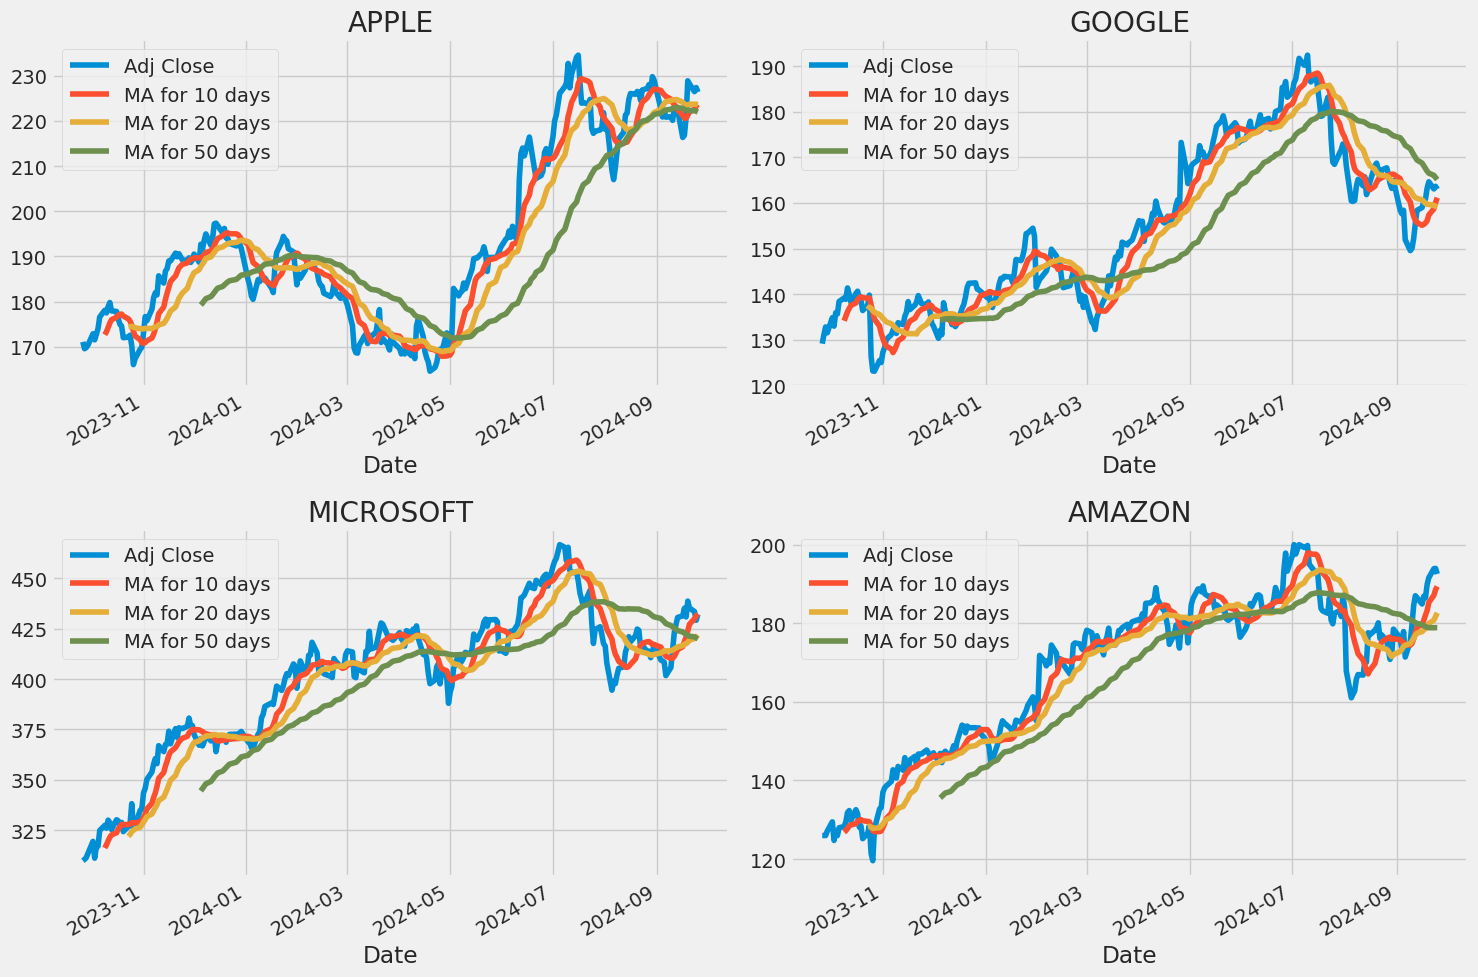

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so, we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

![Stock Analysis](https://github.com/user-attachments/assets/5000c827-517b-4a80-8a7c-d5ecf56445fa)

In our case:
- **P(start)** = Previous Day closing price
- **P(end)** = Current Day closing price

<br> *Dividend is not taken here

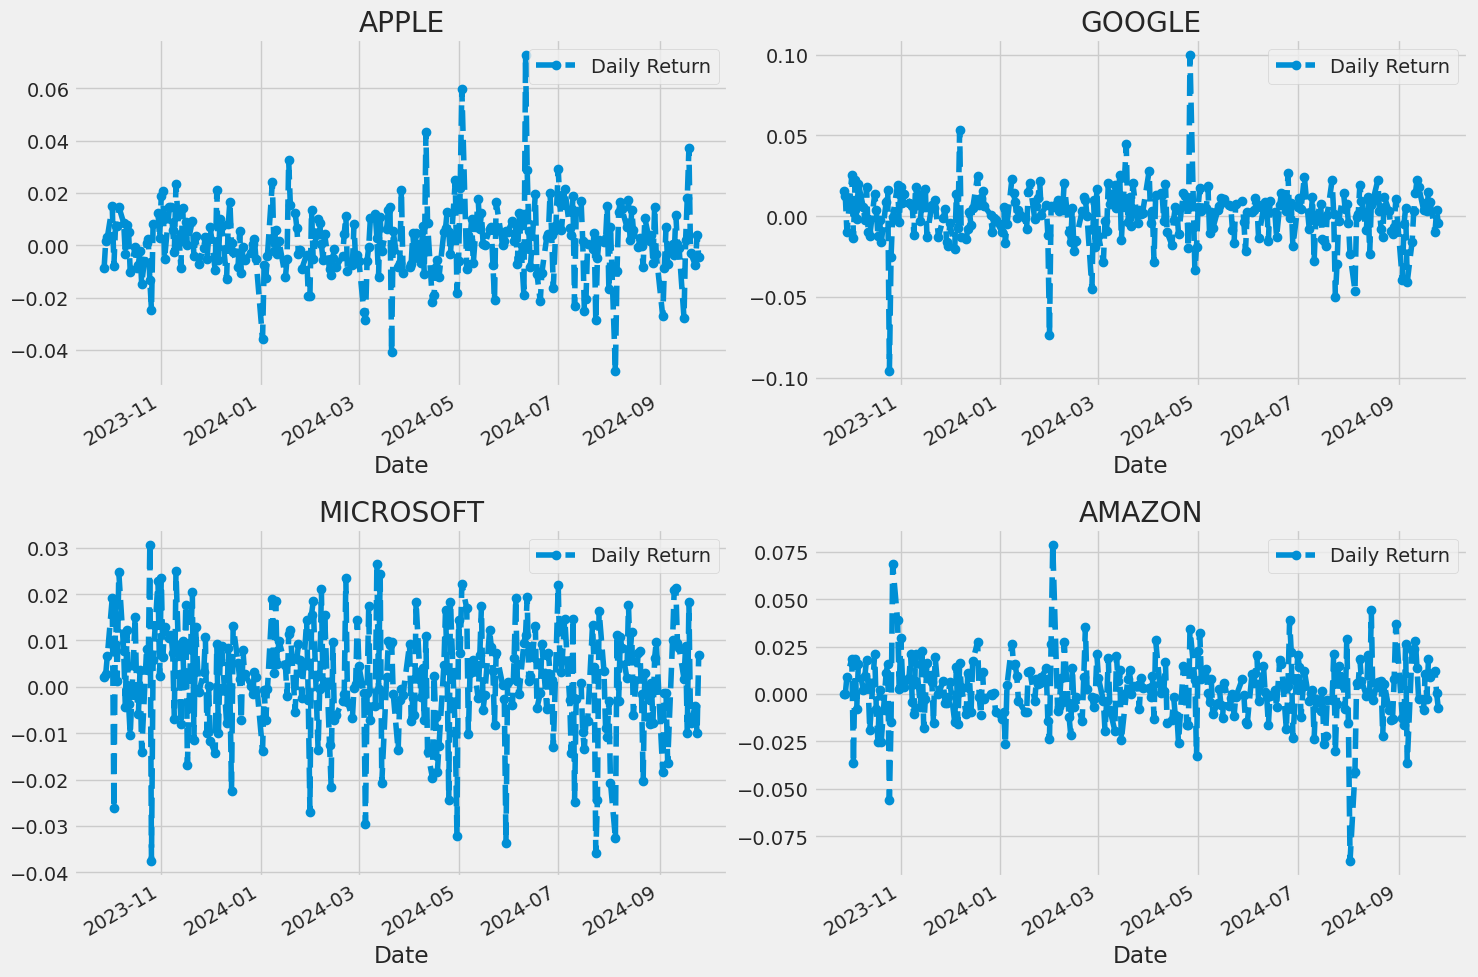

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

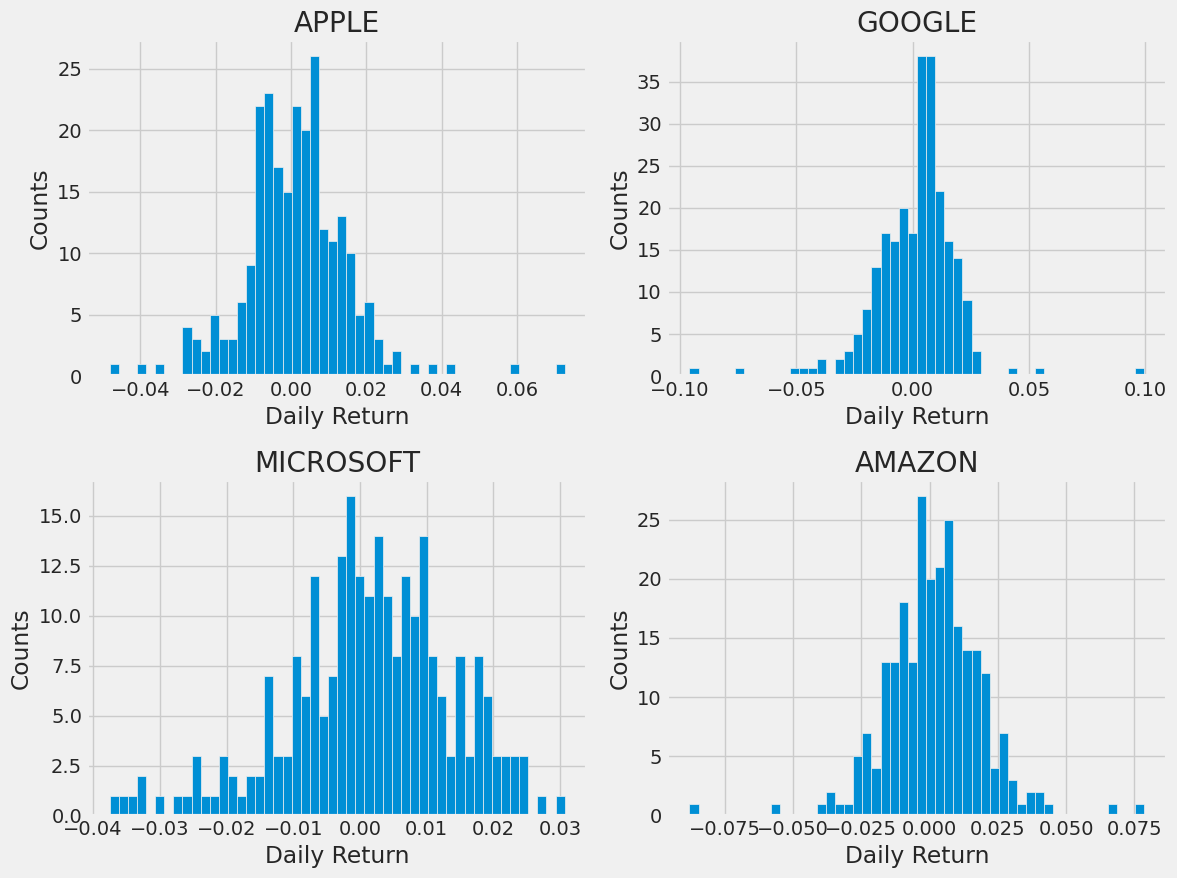

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. What was the correlation between different stocks closing prices?

Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

# closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker                         AAPL      AMZN      GOOG      MSFT
Date                                                             
2023-09-26 00:00:00+00:00       NaN       NaN       NaN       NaN
2023-09-27 00:00:00+00:00 -0.008897  0.000000  0.015527  0.002082
2023-09-28 00:00:00+00:00  0.001526  0.000000  0.012703  0.002718
2023-09-29 00:00:00+00:00  0.003047  0.009049 -0.009615  0.006727
2023-10-02 00:00:00+00:00  0.014835  0.018408  0.025180  0.019161

Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

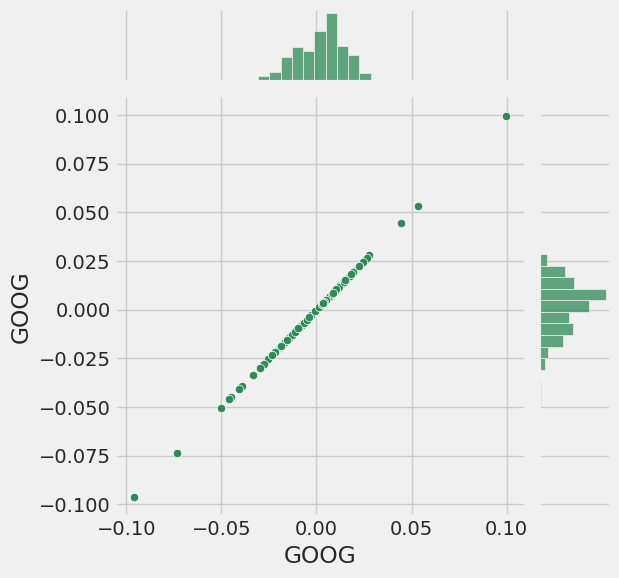

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

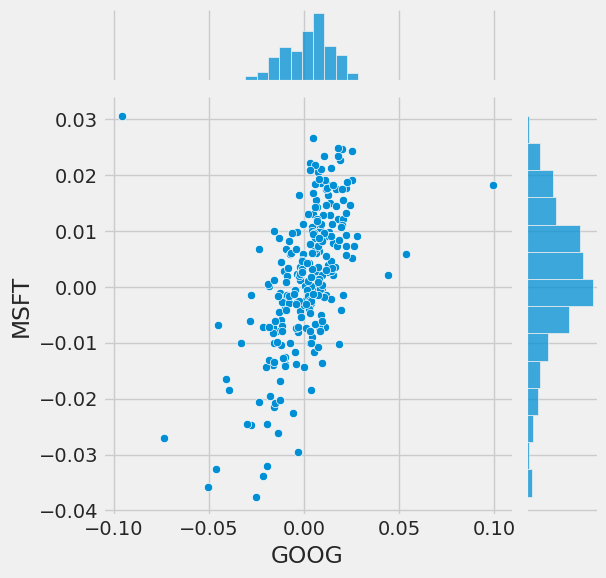

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our technology stock ticker list. We can use sns.pairplot() to automatically create this plot

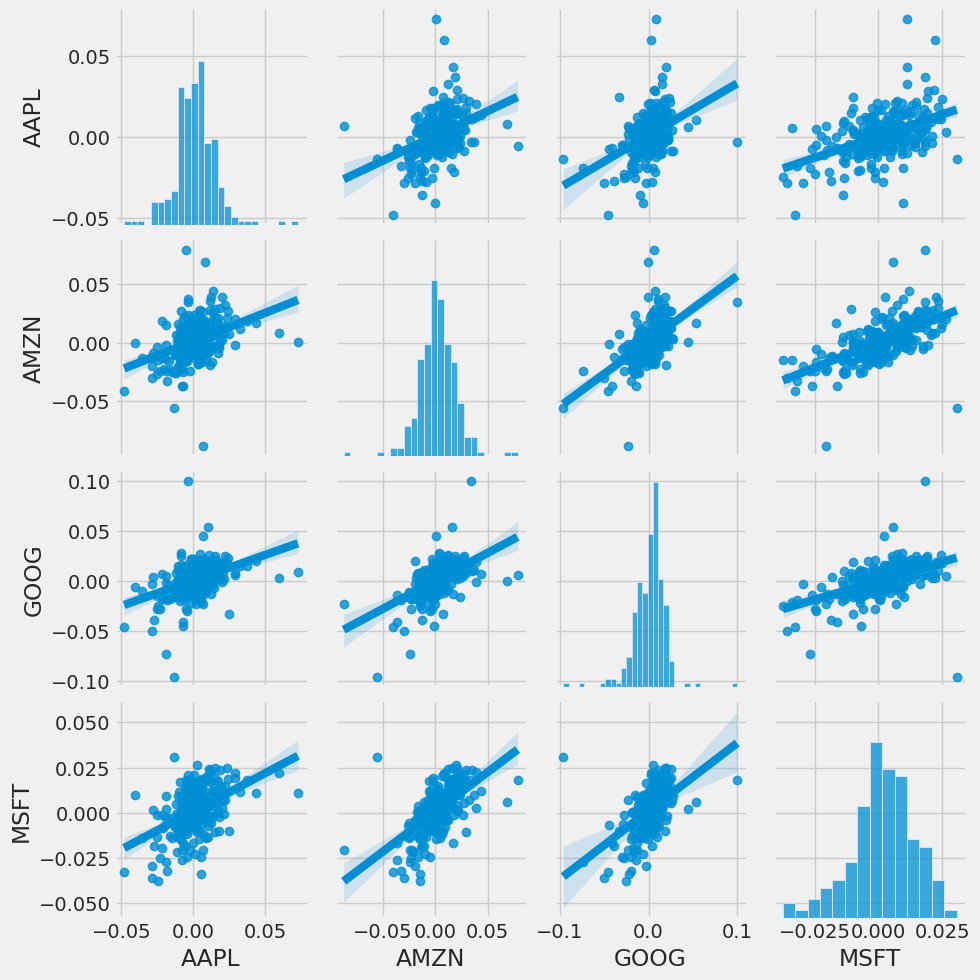

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison.

While the simplicity of just calling `sns.pairplot()` is fantastic we can also use `sns.PairGrid()` for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

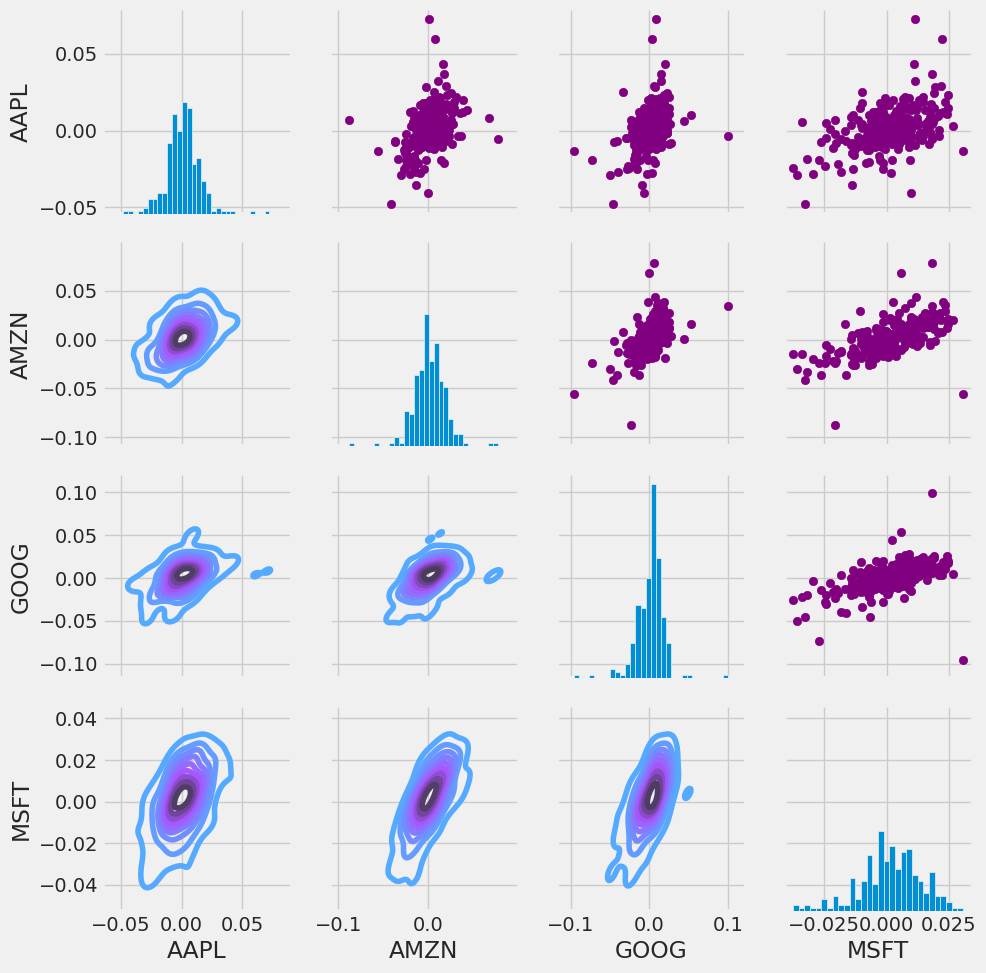

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

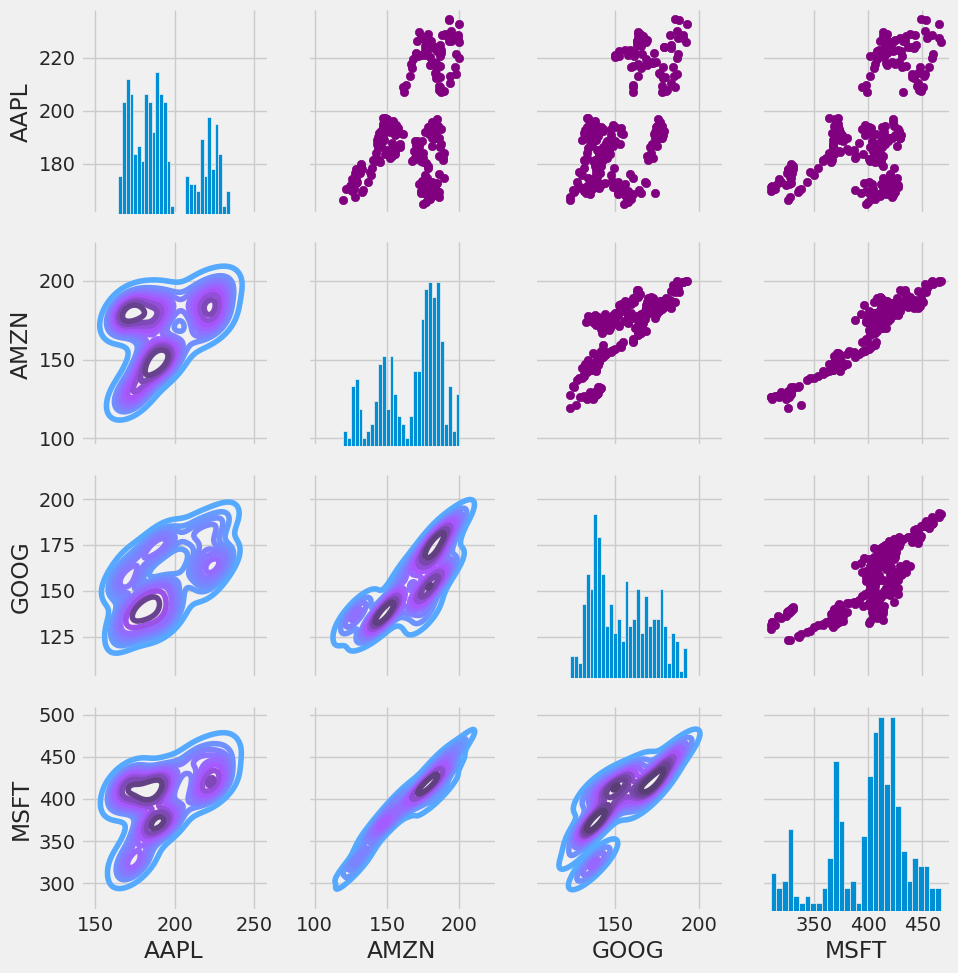

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

Text(0.5, 1.0, 'Correlation of stock closing price')

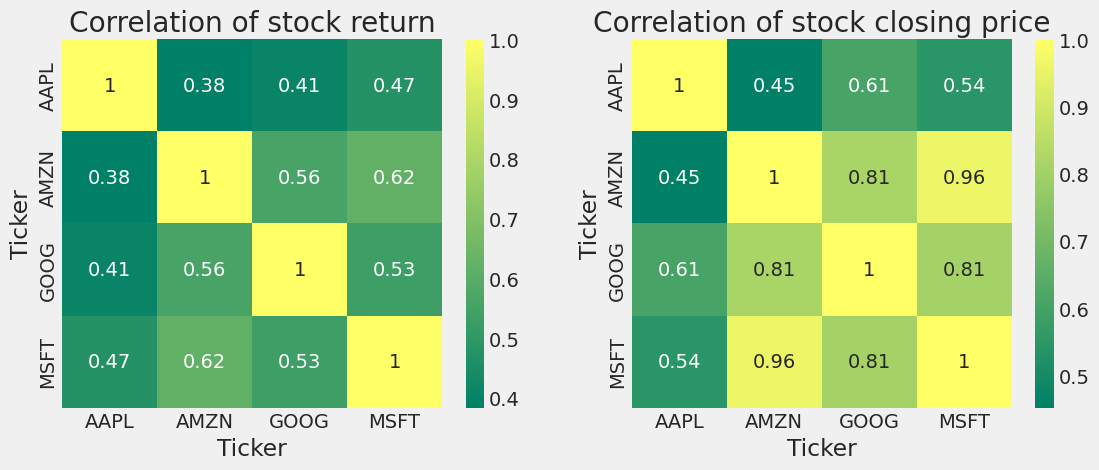

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Just like we suspected in our `PairPlot` we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

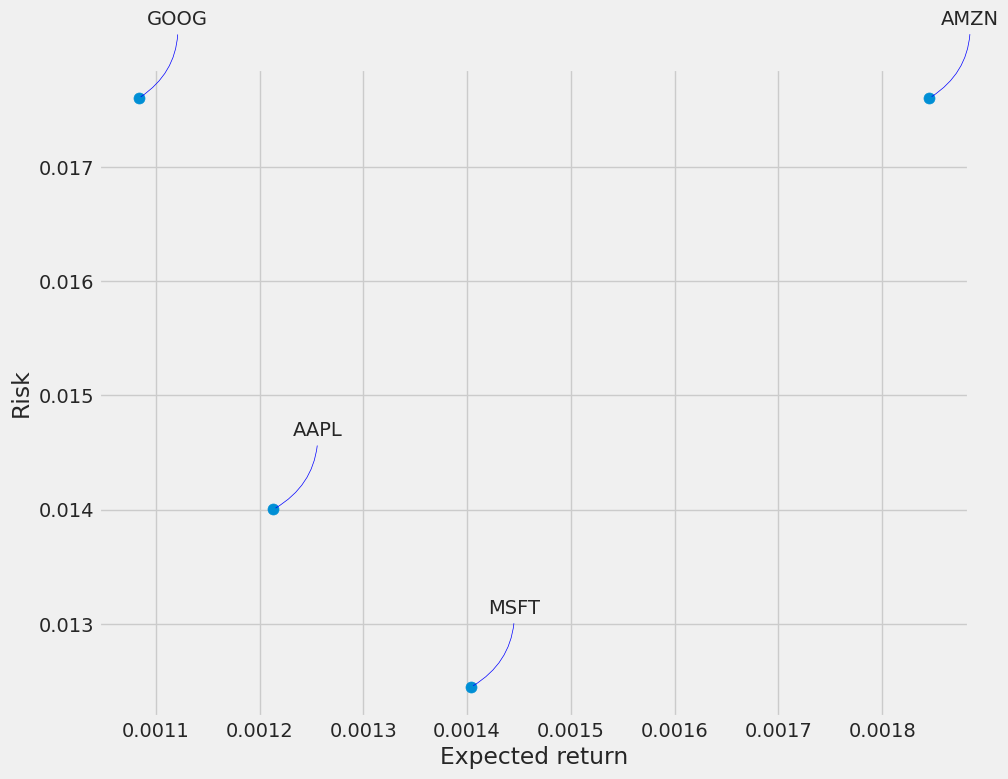

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# <center><h3>Price Prediction

# 6. Predicting Closing Price using Auto Arima

In [5]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.0 MB/s eta 0:00:00


## MICROSOFT

In [30]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-10,end.month,end.day)
df = yf.download('MSFT', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-09-26  45.930000  46.619999  45.759998  46.410000  39.681435  27078800   
2014-09-29  45.980000  46.560001  45.759998  46.439999  39.707073  26091000   
2014-09-30  46.369999  46.480000  46.009998  46.360001  39.638683  33033100   
2014-10-01  46.270000  46.529999  45.849998  45.900002  39.245377  38088400   
2014-10-02  45.830002  46.099998  45.639999  45.759998  39.125660  25119400   
2014-10-03  45.980000  46.299999  45.610001  46.090000  39.407837  32453200   
2014-10-06  46.119999  46.299999  45.919998  46.090000  39.407837  20604000   
2014-10-07  45.860001  45.930000  45.419998  45.529999  38.929016  25723700   
2014-10-08  45.480000  46.889999  45.340000  46.779999  39.997780  33031000   
2014-10-09  46.500000  46.799999  45.740002  45.849998  39.202621  34422800   

                 Date  
Date                   
2014-09-26 2014-09-26  
2014-09-29 2014-09-29  
2014-09-30 2014-09-30  
2014-10-01 2014-10-01  
2014-10-02 2014-10-02  
2014-10-03 2014-10-03  
2014-10-06 2014-10-06  
2014-10-07 2014-10-07  
2014-10-08 2014-10-08  
2014-10-09 2014-10-09

Text(0.5, 1.0, 'Stock Price of Microsoft over the Years')

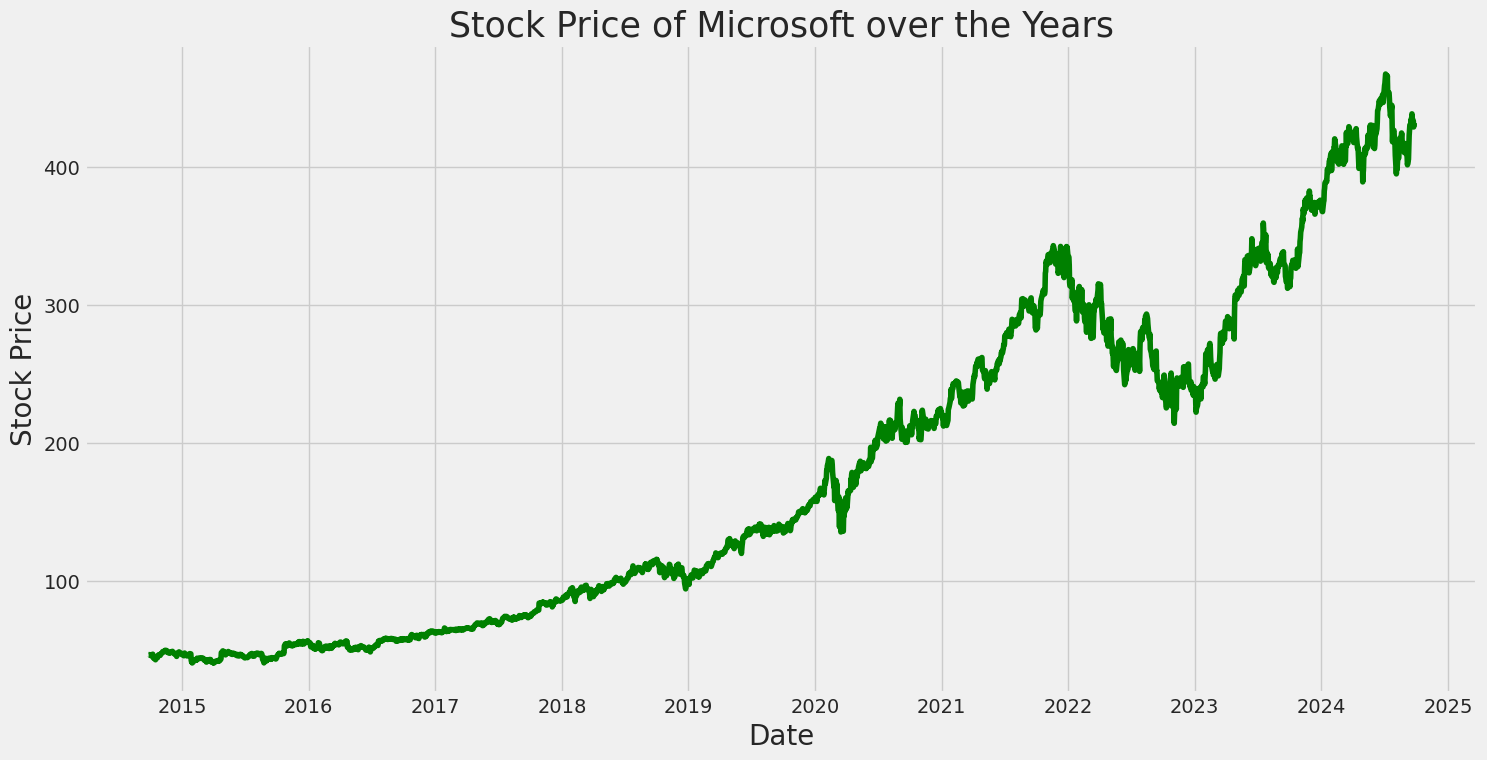

In [31]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Microsoft over the Years',size=25)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 9138.987806013887
Root Mean Squared Error: 95.59805335891463


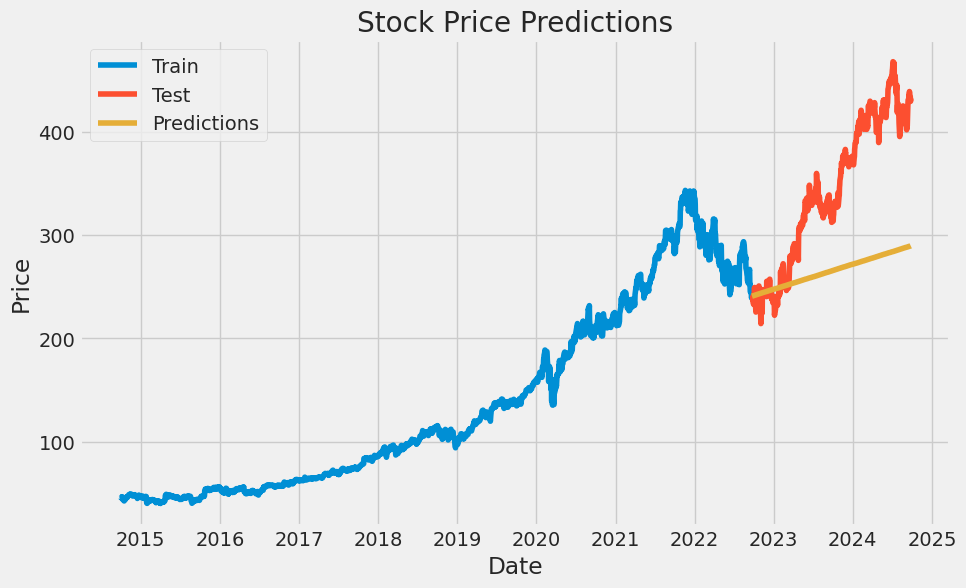

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the Auto ARIMA model
model = auto_arima(train['Close'], seasonal=True, m=12)

# Make predictions
predictions = model.predict(n_periods=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Amazon

In [33]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-10,end.month,end.day)
df = yf.download('AMZN', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open       High      Low      Close  Adj Close    Volume  \
Date                                                                        
2014-09-26  16.030001  16.174999  15.8820  16.160500  16.160500  72760000   
2014-09-29  16.025000  16.187500  15.9500  16.091000  16.091000  38492000   
2014-09-30  16.068001  16.171499  15.9255  16.122000  16.122000  52724000   
2014-10-01  16.101999  16.108500  15.7775  15.873000  15.873000  61782000   
2014-10-02  15.846000  15.926500  15.5655  15.920500  15.920500  71078000   
2014-10-03  16.018000  16.257999  15.9765  16.136999  16.136999  60748000   
2014-10-06  16.174999  16.206499  15.9800  16.110001  16.110001  45806000   
2014-10-07  15.971500  16.100000  15.8335  15.849000  15.849000  47308000   
2014-10-08  15.829000  16.205500  15.7070  16.135000  16.135000  69056000   
2014-10-09  16.074499  16.113501  15.7260  15.768500  15.768500  71758000   

                 Date  
Date                   
2014-09-26 2014-09-26  
2014-09-29 2014-09-29  
2014-09-30 2014-09-30  
2014-10-01 2014-10-01  
2014-10-02 2014-10-02  
2014-10-03 2014-10-03  
2014-10-06 2014-10-06  
2014-10-07 2014-10-07  
2014-10-08 2014-10-08  
2014-10-09 2014-10-09

Text(0.5, 1.0, 'Stock Price of Amazon over the Years')

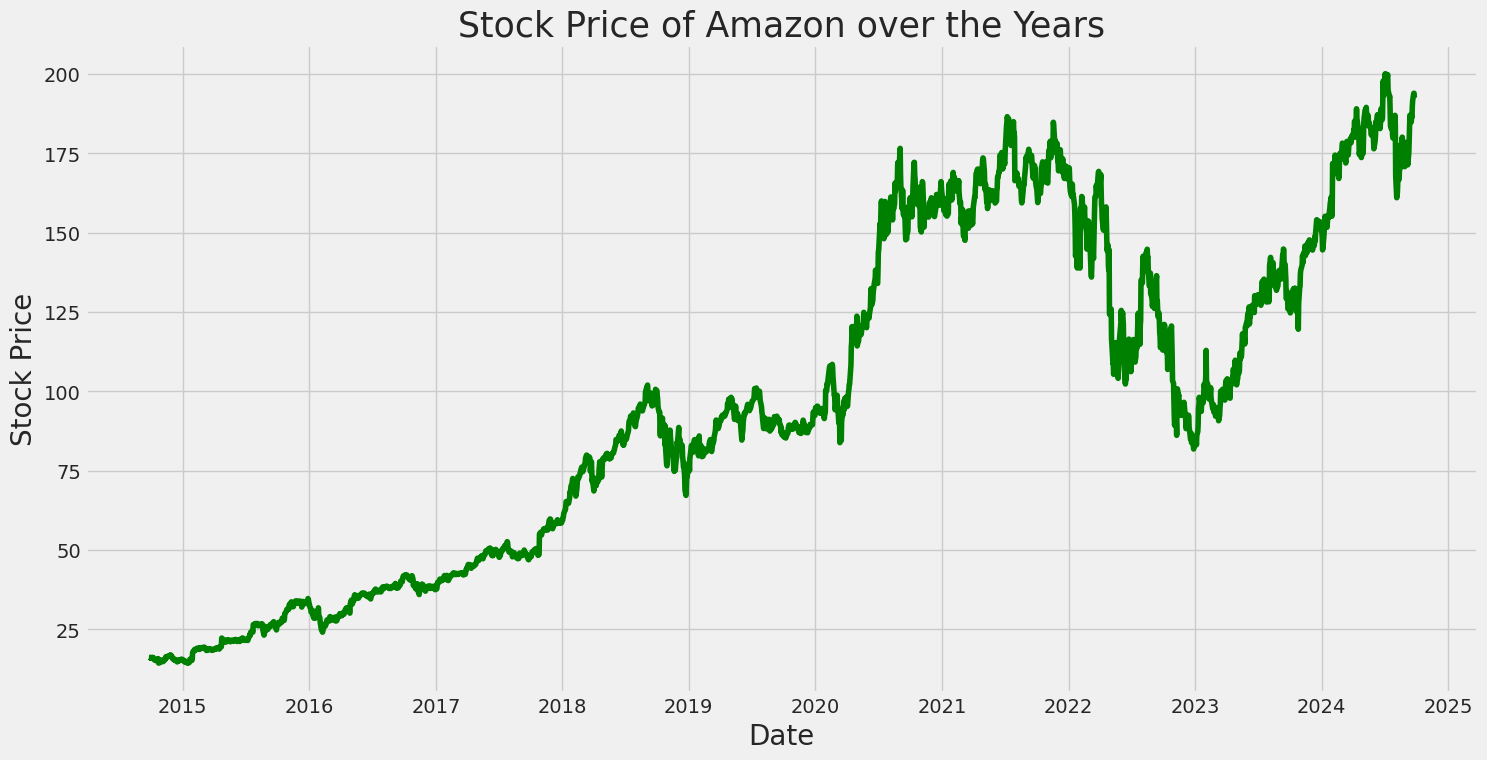

In [34]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Amazon over the Years',size=25)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 1632.9933775729226
Root Mean Squared Error: 40.4103127626219


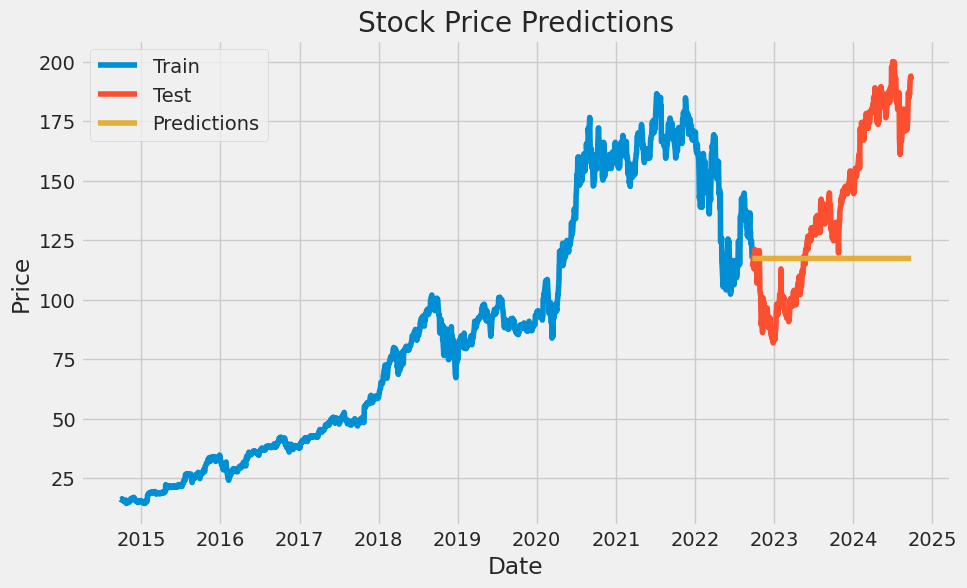

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the Auto ARIMA model
model = auto_arima(train['Close'], seasonal=True, m=12)

# Make predictions
predictions = model.predict(n_periods=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Apple

In [49]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-10,end.month,end.day)
df = yf.download('AAPL', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2014-09-26  24.632500  25.187500  24.600000  25.187500  22.364166  249482000   
2014-09-29  24.662500  25.110001  24.657499  25.027500  22.222101  199065200   
2014-09-30  25.202499  25.385000  25.132500  25.187500  22.364166  221056400   
2014-10-01  25.147499  25.172501  24.674999  24.795000  22.015659  205965200   
2014-10-02  24.817499  25.055000  24.510000  24.975000  22.175491  191031200   
2014-10-03  24.860001  25.052500  24.760000  24.905001  22.113329  173878400   
2014-10-06  24.987499  25.162500  24.855000  24.905001  22.113329  148204800   
2014-10-07  24.857500  25.030001  24.682501  24.687500  21.920208  168376800   
2014-10-08  24.690001  25.277500  24.577499  25.200001  22.375256  229618800   
2014-10-09  25.385000  25.594999  25.152500  25.254999  22.424097  309506000   

                 Date  
Date                   
2014-09-26 2014-09-26  
2014-09-29 2014-09-29  
2014-09-30 2014-09-30  
2014-10-01 2014-10-01  
2014-10-02 2014-10-02  
2014-10-03 2014-10-03  
2014-10-06 2014-10-06  
2014-10-07 2014-10-07  
2014-10-08 2014-10-08  
2014-10-09 2014-10-09

Text(0.5, 1.0, 'Stock Price of Apple over the Years')

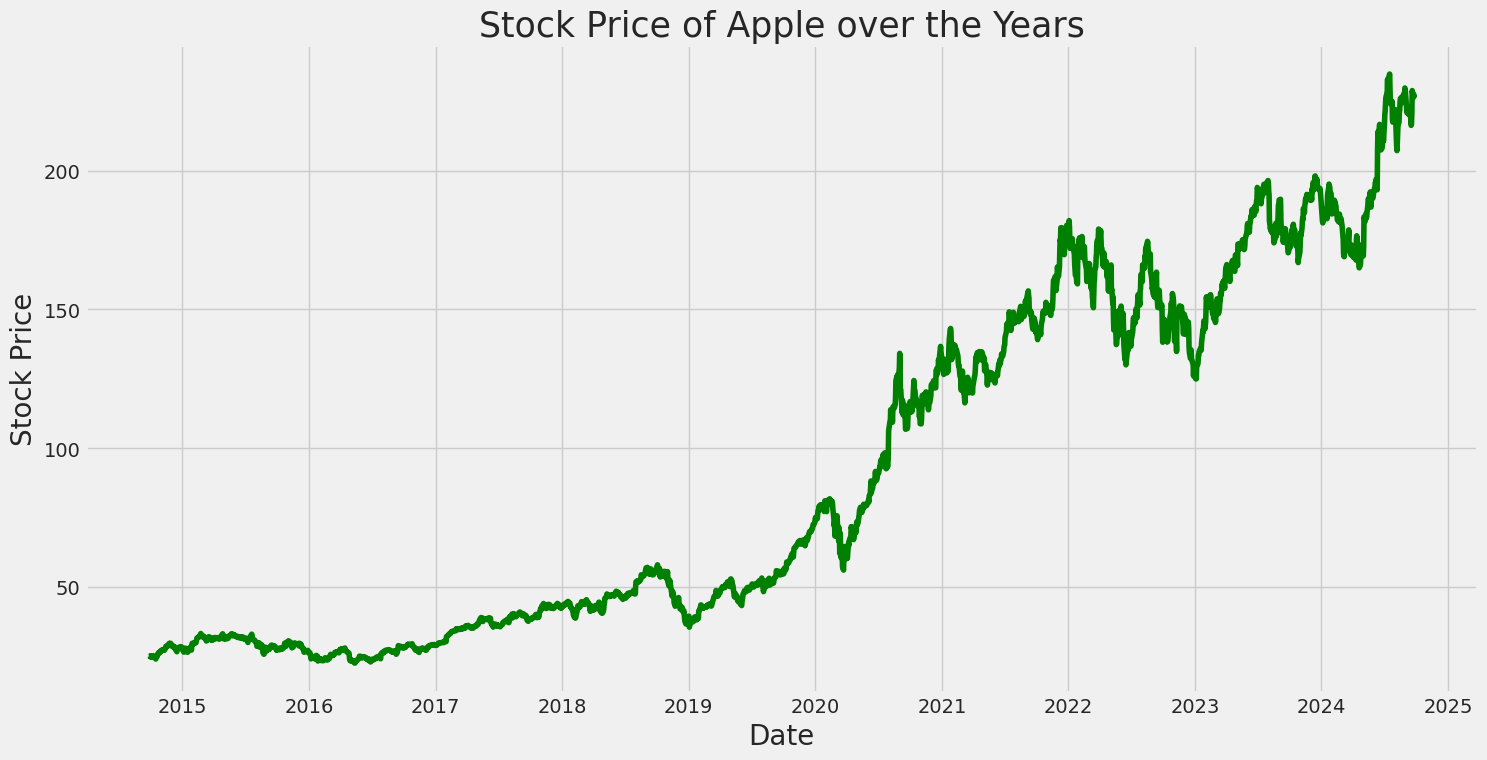

In [50]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Apple over the Years',size=25)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 394.9416249104829
Root Mean Squared Error: 19.873138275332433


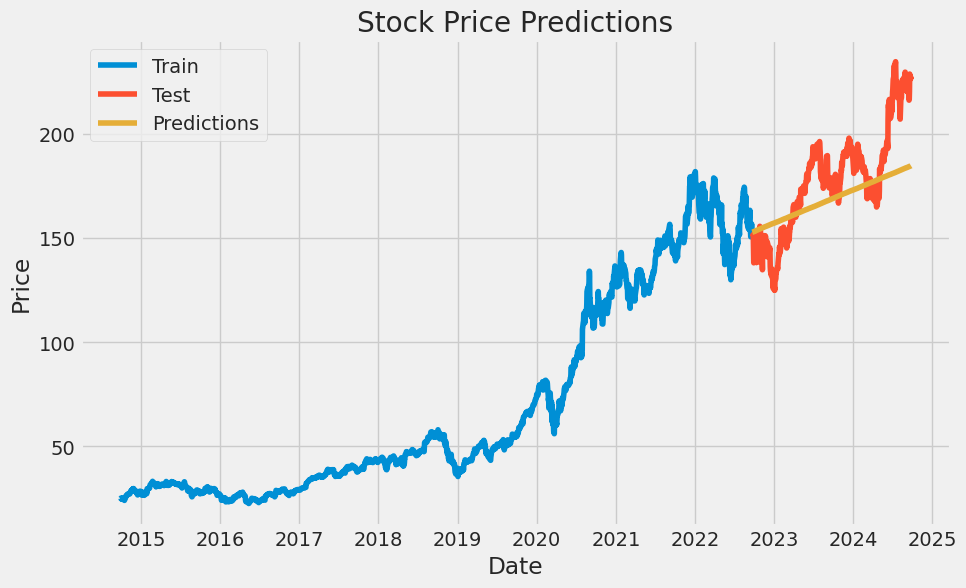

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the Auto ARIMA model
model = auto_arima(train['Close'], seasonal=True, m=12)

# Make predictions
predictions = model.predict(n_periods=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Google

In [39]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-10,end.month,end.day)
df = yf.download('GOOG', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2014-09-26  28.724138  28.883202  28.654329  28.775995  28.705500  28873054   
2014-09-29  28.509228  28.830345  28.480307  28.739098  28.668694  25648224   
2014-09-30  28.767519  28.913118  28.564077  28.788960  28.718431  32434806   
2014-10-01  28.721645  28.799931  28.272877  28.335705  28.266289  28909153   
2014-10-02  28.287836  28.517206  28.088882  28.425957  28.356318  23568530   
2014-10-03  28.574051  28.782228  28.546625  28.685246  28.614973  22834521   
2014-10-06  28.860764  28.970463  28.643360  28.788462  28.717936  24292512   
2014-10-07  28.641365  28.684746  28.109823  28.109823  28.040958  38226664   
2014-10-08  28.201075  28.615437  27.798180  28.546625  28.476690  39817018   
2014-10-09  28.480806  28.496264  27.876465  27.967216  27.898703  50496258   

                 Date  
Date                   
2014-09-26 2014-09-26  
2014-09-29 2014-09-29  
2014-09-30 2014-09-30  
2014-10-01 2014-10-01  
2014-10-02 2014-10-02  
2014-10-03 2014-10-03  
2014-10-06 2014-10-06  
2014-10-07 2014-10-07  
2014-10-08 2014-10-08  
2014-10-09 2014-10-09

Text(0.5, 1.0, 'Stock Price of Google over the Years')

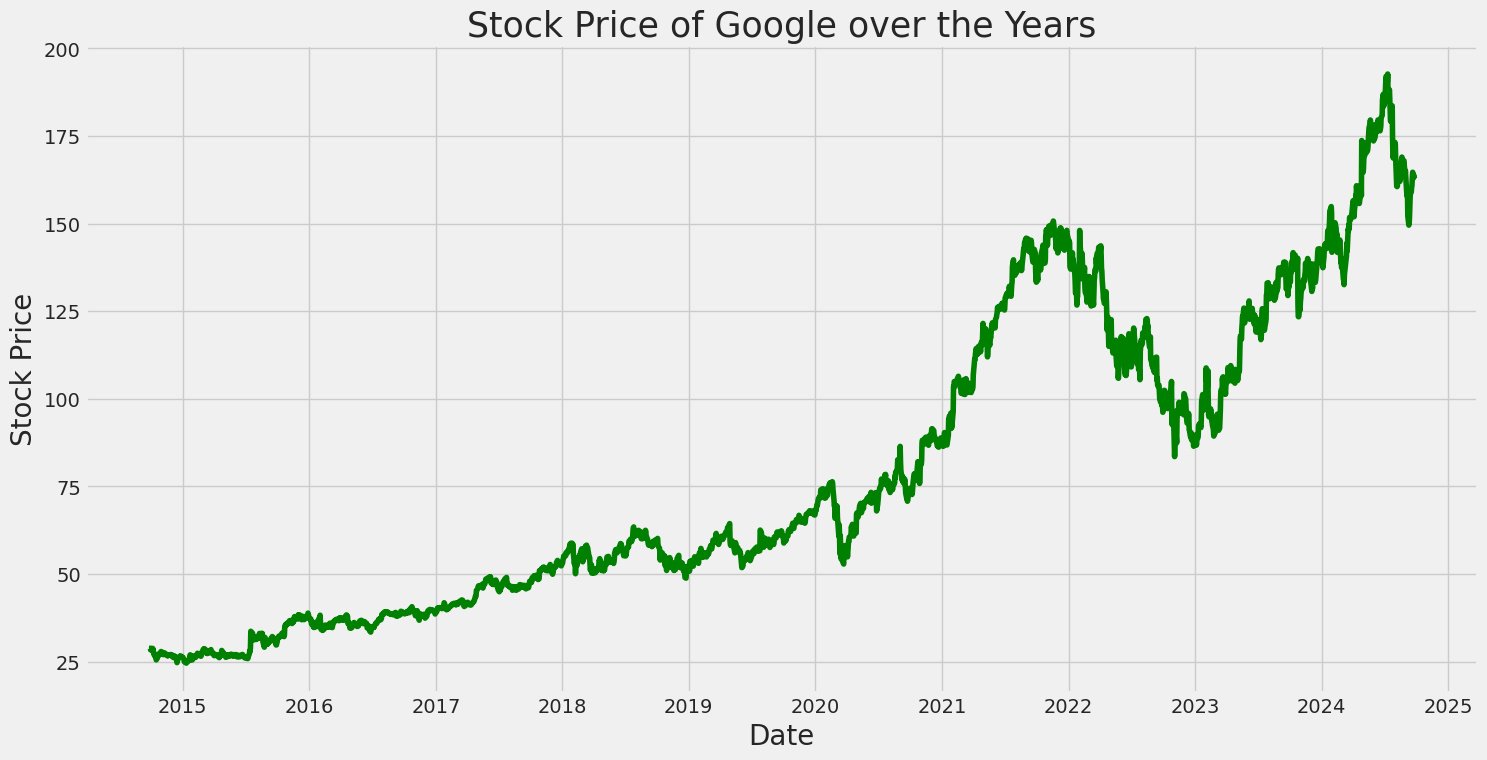

In [40]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history',color='g')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price of Google over the Years',size=25)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Squared Error: 1001.3995356631908
Root Mean Squared Error: 31.644897466466706


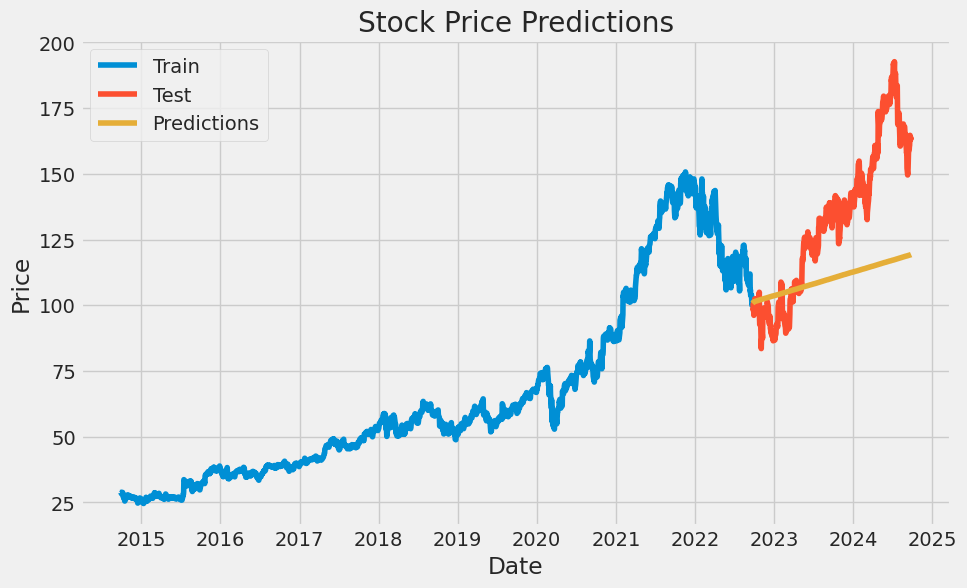

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit the Auto ARIMA model
model = auto_arima(train['Close'], seasonal=True, m=12)

# Make predictions
predictions = model.predict(n_periods=len(test))

# Calculate the mean squared error
mse = mean_squared_error(test['Close'], predictions)
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.title('Stock Price Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 7. Predicting Closing Price using Prophet

In [ ]:
!pip install prophet

## Microsoft

In [65]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
df = yf.download('MSFT', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-26  315.130005  315.880005  310.019989  312.140015  309.814514   
2023-09-27  312.299988  314.299988  309.690002  312.790009  310.459656   
2023-09-28  310.989990  315.480011  309.450012  313.640015  311.303345   
2023-09-29  317.750000  319.470001  314.980011  315.750000  313.397614   
2023-10-02  316.279999  321.890015  315.179993  321.799988  319.402527   
2023-10-03  320.829987  321.390015  311.209991  313.390015  311.055206   
2023-10-04  314.029999  320.040009  314.000000  318.959991  316.583710   
2023-10-05  319.089996  319.980011  314.899994  319.359985  316.980682   
2023-10-06  316.549988  329.190002  316.299988  327.260010  324.821869   
2023-10-09  324.750000  330.299988  323.179993  329.820007  327.362793   

              Volume       Date  
Date                             
2023-09-26  26297600 2023-09-26  
2023-09-27  19410100 2023-09-27  
2023-09-28  19683600 2023-09-28  
2023-09-29  24140300 2023-09-29  
2023-10-02  20570000 2023-10-02  
2023-10-03  21033500 2023-10-03  
2023-10-04  20720100 2023-10-04  
2023-10-05  16965600 2023-10-05  
2023-10-06  25645500 2023-10-06  
2023-10-09  19891200 2023-10-09

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/bak7ktdo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/n6ccyhq_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51396', 'data', 'file=/tmp/tmpoad2i0f4/bak7ktdo.json', 'init=/tmp/tmpoad2i0f4/n6ccyhq_.json', 'output', 'file=/tmp/tmpoad2i0f4/prophet_model28u2plit/prophet_model-20240926104645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:46:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error: 4412.652590115404
Root Mean Squared Error: 66.42779982895266


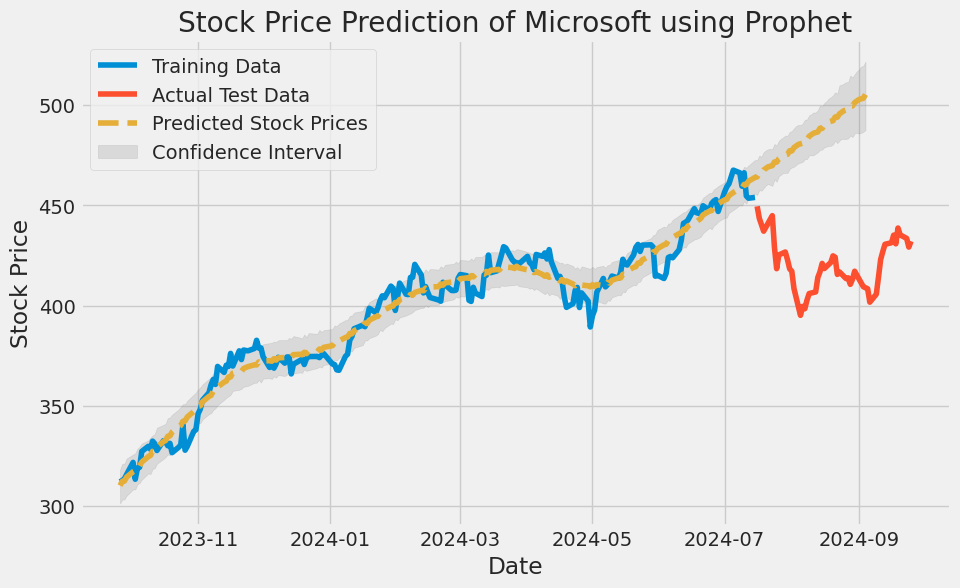

In [66]:
from prophet import Prophet

# Step 3: Prepare the data
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Step 4: Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Step 5: Initialize and fit the model on the training data
model = Prophet()
model.fit(train_df)

# Step 6: Make future predictions
future = model.make_future_dataframe(periods=len(test_df))  # Predicting the length of the test set
forecast = model.predict(future)

# Step 7: Evaluate the model
mse = mean_squared_error(test_df['y'], forecast['yhat'][-len(test_df):])
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Step 7: Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Prices', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction of Microsoft using Prophet')
plt.legend()
plt.grid(True)
plt.show()

## Apple

In [63]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
df = yf.download('AAPL', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-26  174.820007  175.199997  171.660004  171.960007  171.084549   
2023-09-27  172.619995  173.039993  169.050003  170.429993  169.562317   
2023-09-28  169.339996  172.029999  167.619995  170.690002  169.821014   
2023-09-29  172.020004  173.070007  170.339996  171.210007  170.338379   
2023-10-02  171.220001  174.300003  170.929993  173.750000  172.865417   
2023-10-03  172.259995  173.630005  170.820007  172.399994  171.522293   
2023-10-04  171.089996  174.210007  170.970001  173.660004  172.775894   
2023-10-05  173.789993  175.449997  172.679993  174.910004  174.019531   
2023-10-06  173.800003  177.990005  173.179993  177.490005  176.586395   
2023-10-09  176.809998  179.050003  175.800003  178.990005  178.078751   

              Volume       Date  
Date                             
2023-09-26  64588900 2023-09-26  
2023-09-27  66921800 2023-09-27  
2023-09-28  56294400 2023-09-28  
2023-09-29  51814200 2023-09-29  
2023-10-02  52164500 2023-10-02  
2023-10-03  49594600 2023-10-03  
2023-10-04  53020300 2023-10-04  
2023-10-05  48527900 2023-10-05  
2023-10-06  57224100 2023-10-06  
2023-10-09  42390800 2023-10-09

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/1unf9hm9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/akqvwo_g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73850', 'data', 'file=/tmp/tmpoad2i0f4/1unf9hm9.json', 'init=/tmp/tmpoad2i0f4/akqvwo_g.json', 'output', 'file=/tmp/tmpoad2i0f4/prophet_modelhv375clr/prophet_model-20240926104632.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:46:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error: 811.0491182390896
Root Mean Squared Error: 28.478924106066394


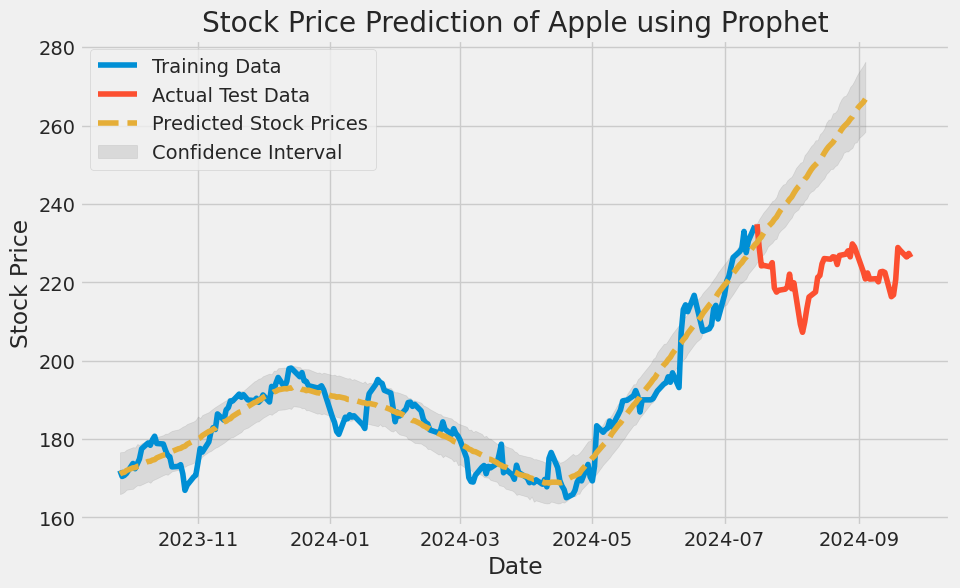

In [64]:
from prophet import Prophet

# Step 3: Prepare the data
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Step 4: Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Step 5: Initialize and fit the model on the training data
model = Prophet()
model.fit(train_df)

# Step 6: Make future predictions
future = model.make_future_dataframe(periods=len(test_df))  # Predicting the length of the test set
forecast = model.predict(future)

# Step 7: Evaluate the model
mse = mean_squared_error(test_df['y'], forecast['yhat'][-len(test_df):])
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Step 7: Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Prices', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction of Apple using Prophet')
plt.legend()
plt.grid(True)
plt.show()

## Amazon

In [59]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
df = yf.download('AMZN', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-26  130.119995  130.389999  125.279999  125.980003  125.980003   
2023-09-27  125.760002  127.480003  124.129997  125.980003  125.980003   
2023-09-28  124.040001  126.580002  123.040001  125.980003  125.980003   
2023-09-29  128.199997  129.149994  126.320000  127.120003  127.120003   
2023-10-02  127.279999  130.470001  126.540001  129.460007  129.460007   
2023-10-03  128.059998  128.520004  124.250000  124.720001  124.720001   
2023-10-04  126.059998  127.360001  125.680000  127.000000  127.000000   
2023-10-05  126.709999  126.730003  124.330002  125.959999  125.959999   
2023-10-06  124.160004  128.449997  124.129997  127.959999  127.959999   
2023-10-09  126.220001  128.789993  124.760002  128.259995  128.259995   

              Volume       Date  
Date                             
2023-09-26  73048200 2023-09-26  
2023-09-27  66553400 2023-09-27  
2023-09-28  54555000 2023-09-28  
2023-09-29  62377600 2023-09-29  
2023-10-02  48029700 2023-10-02  
2023-10-03  51565000 2023-10-03  
2023-10-04  44203900 2023-10-04  
2023-10-05  39660600 2023-10-05  
2023-10-06  46795900 2023-10-06  
2023-10-09  38773700 2023-10-09

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/7r4rp61f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/zhqto9aq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50544', 'data', 'file=/tmp/tmpoad2i0f4/7r4rp61f.json', 'init=/tmp/tmpoad2i0f4/zhqto9aq.json', 'output', 'file=/tmp/tmpoad2i0f4/prophet_modelsrx1f25p/prophet_model-20240926104529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:45:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error: 433.7135495072973
Root Mean Squared Error: 20.825790489373922


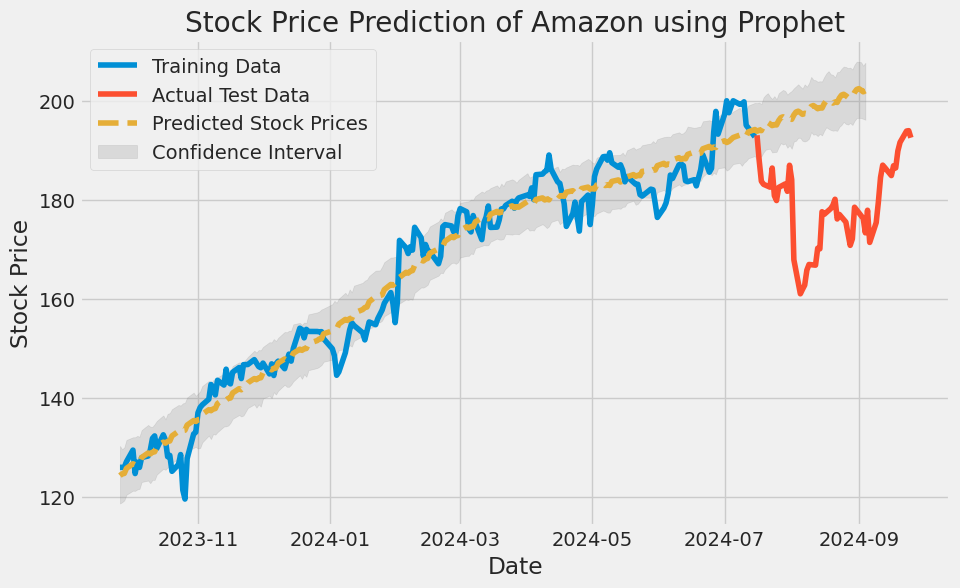

In [60]:
from prophet import Prophet

# Step 3: Prepare the data
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Step 4: Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Step 5: Initialize and fit the model on the training data
model = Prophet()
model.fit(train_df)

# Step 6: Make future predictions
future = model.make_future_dataframe(periods=len(test_df))  # Predicting the length of the test set
forecast = model.predict(future)

# Step 7: Evaluate the model
mse = mean_squared_error(test_df['y'], forecast['yhat'][-len(test_df):])
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Step 7: Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Prices', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction of Amazon using Prophet')
plt.legend()
plt.grid(True)
plt.show()

## Google

In [61]:
from pmdarima.arima import auto_arima

# Get the stock quote
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)
df = yf.download('GOOG', start=start, end=end)

df['Date'] = pd.to_datetime(df.index,format='%m/%d/%Y %H:%M:%S')
df.index = df['Date']

df.head(10)

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-26  130.914001  131.404999  128.190002  129.449997  129.132874   
2023-09-27  129.440002  131.720001  129.380005  131.460007  131.137955   
2023-09-28  130.690002  134.179993  130.690002  133.130005  132.803864   
2023-09-29  134.080002  134.889999  131.320007  131.850006  131.526993   
2023-10-02  132.154999  135.360001  132.065002  135.169998  134.838852   
2023-10-03  134.929993  135.240005  132.815002  133.300003  132.973434   
2023-10-04  133.660004  136.570007  133.429993  136.270004  135.936157   
2023-10-05  136.130005  136.500000  134.455002  135.990005  135.656860   
2023-10-06  134.940002  139.186005  134.940002  138.729996  138.390137   
2023-10-09  137.990005  139.970001  136.699997  139.500000  139.158249   

              Volume       Date  
Date                             
2023-09-26  20378800 2023-09-26  
2023-09-27  18764200 2023-09-27  
2023-09-28  18201400 2023-09-28  
2023-09-29  23224200 2023-09-29  
2023-10-02  19210400 2023-10-02  
2023-10-03  19628700 2023-10-03  
2023-10-04  22848000 2023-10-04  
2023-10-05  15922900 2023-10-05  
2023-10-06  20819300 2023-10-06  
2023-10-09  16599100 2023-10-09

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/do_1gzjf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoad2i0f4/0zbrmh92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41840', 'data', 'file=/tmp/tmpoad2i0f4/do_1gzjf.json', 'init=/tmp/tmpoad2i0f4/0zbrmh92.json', 'output', 'file=/tmp/tmpoad2i0f4/prophet_modelumn7wsdx/prophet_model-20240926104546.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:45:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:45:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Squared Error: 1129.3825320966685
Root Mean Squared Error: 33.606287091802756


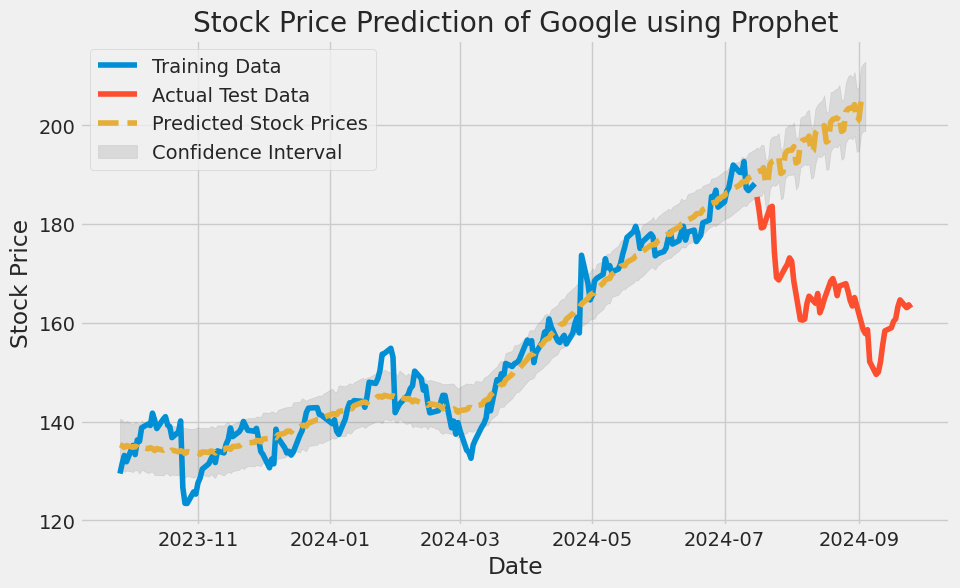

In [62]:
from prophet import Prophet

# Step 3: Prepare the data
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds'])

# Step 4: Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Step 5: Initialize and fit the model on the training data
model = Prophet()
model.fit(train_df)

# Step 6: Make future predictions
future = model.make_future_dataframe(periods=len(test_df))  # Predicting the length of the test set
forecast = model.predict(future)

# Step 7: Evaluate the model
mse = mean_squared_error(test_df['y'], forecast['yhat'][-len(test_df):])
print(f'Mean Squared Error: {mse}')

rsme = np.sqrt(mse)
print(f'Root Mean Squared Error: {rsme}')

# Step 7: Plot the results using matplotlib
plt.figure(figsize=(10, 6))
plt.plot(train_df['ds'], train_df['y'], label='Training Data')
plt.plot(test_df['ds'], test_df['y'], label='Actual Test Data')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Stock Prices', linestyle='--')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction of Google using Prophet')
plt.legend()
plt.grid(True)
plt.show()

# 8. Predicting Closing stock price Using LSTM

## APPLE

In [ ]:
# Get the stock quote
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   14.621429   14.732143   14.607143   14.686786   12.402625   
2012-01-04   14.642857   14.810000   14.617143   14.765714   12.469280   
2012-01-05   14.819643   14.948214   14.738214   14.929643   12.607713   
2012-01-06   14.991786   15.098214   14.972143   15.085714   12.739513   
2012-01-09   15.196429   15.276786   15.048214   15.061786   12.719306   
...                ...         ...         ...         ...         ...   
2024-09-19  224.990005  229.820007  224.630005  228.869995  228.869995   
2024-09-20  229.970001  233.089996  227.619995  228.199997  228.199997   
2024-09-23  227.339996  229.449997  225.809998  226.470001  226.470001   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.029999  226.369995  226.369995   

               Volume  
Date                   
2012-01-03  302220800  
2012-01-04  260022000  
2012-01-05  271269600  
2012-01-06  318292800  
2012-01-09  394024400  
...               ...  
2024-09-19   66781300  
2024-09-20  318679900  
2024-09-23   54146000  
2024-09-24   43556100  
2024-09-25   40779133  

[3203 rows x 6 columns]

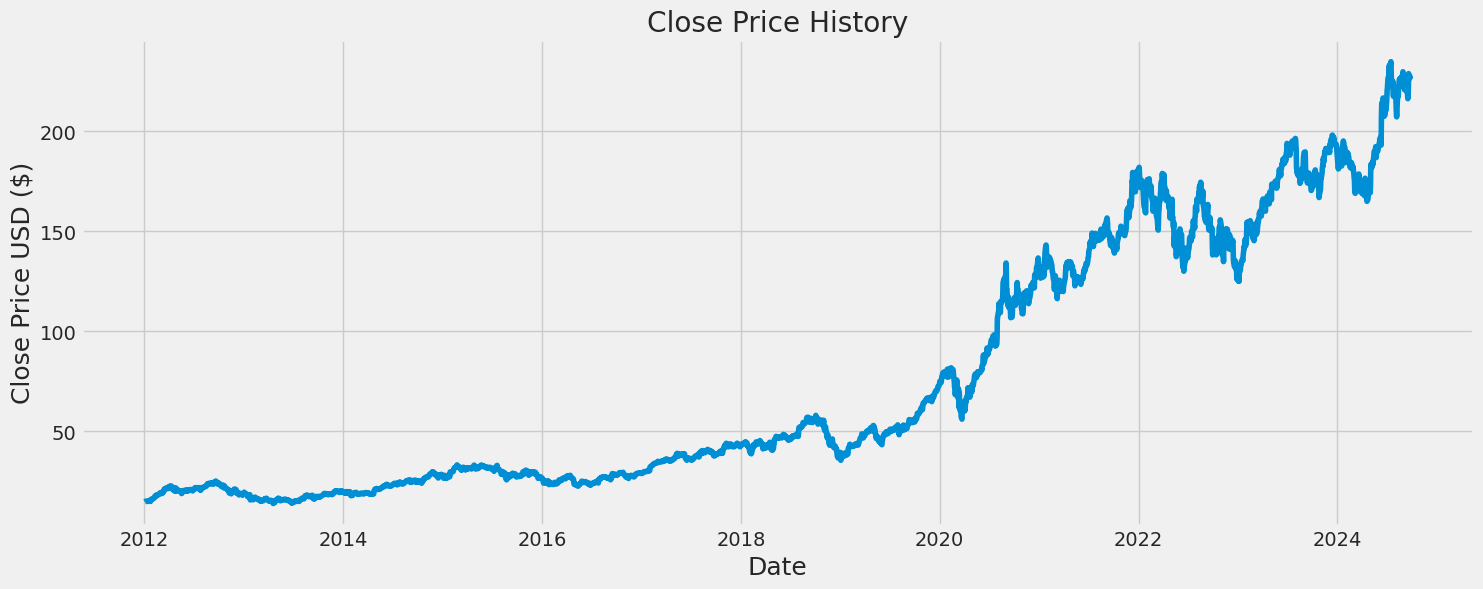

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3043

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00334711],
       [0.00370446],
       [0.00444665],
       ...,
       [0.96219536],
       [0.96627008],
       [0.96174258]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Rwheshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

In [ ]:
x_train.shape

(2983, 60, 1)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
num_epochs = 1
batch_size = 50
learning_rate = 0.001

# Convert training data to torch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(x_train_tensor.device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(train_loader):
        outputs = model(x_batch)
        y_batch = y_batch.view(-1, 1)  # Reshape y_batch to match the shape of outputs
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Convert testing data to torch tensors
x_test_tensor = torch.from_numpy(x_test).float()

# Get the model's predicted price values
model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).cpu().numpy()

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.42330180047557

<ipython-input-88-c60e9c91130d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


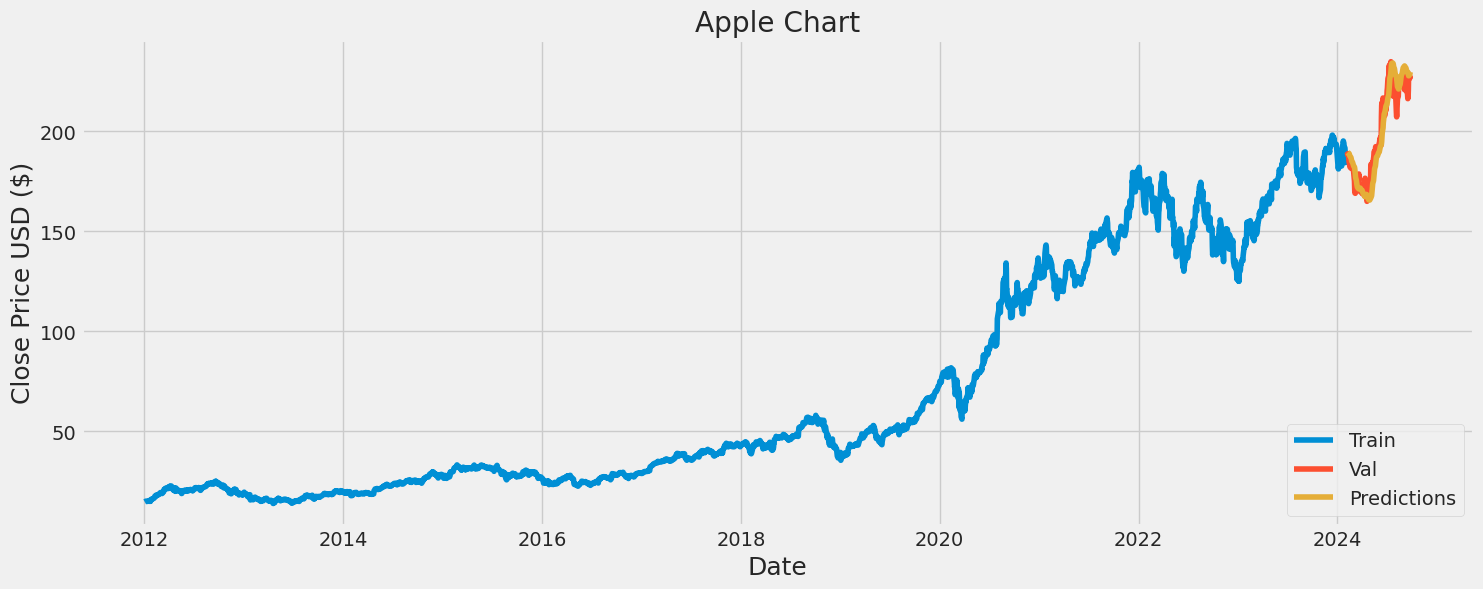

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Apple Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2024-02-07  189.410004   189.378815
2024-02-08  188.320007   189.233597
2024-02-09  188.850006   189.118851
2024-02-12  187.149994   189.060120
2024-02-13  185.039993   188.930099
...                ...          ...
2024-09-19  228.869995   227.739273
2024-09-20  228.199997   227.881516
2024-09-23  226.470001   228.382309
2024-09-24  227.369995   228.977509
2024-09-25  226.369995   229.650467

[160 rows x 2 columns]

## AMAZON

In [ ]:
# Get the stock quote
df = yf.download('AMZN', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03    8.794500    8.974000    8.777500    8.951500    8.951500   
2012-01-04    8.960500    9.025000    8.803500    8.875500    8.875500   
2012-01-05    8.797000    8.912500    8.702500    8.880500    8.880500   
2012-01-06    8.903500    9.232500    8.875000    9.130500    9.130500   
2012-01-09    9.138000    9.218500    8.850000    8.928000    8.928000   
...                ...         ...         ...         ...         ...   
2024-09-19  190.039993  190.990005  188.470001  189.869995  189.869995   
2024-09-20  190.229996  191.839996  187.410004  191.600006  191.600006   
2024-09-23  191.639999  194.449997  190.570007  193.880005  193.880005   
2024-09-24  194.270004  195.369995  190.130005  193.960007  193.960007   
2024-09-25  193.750000  193.949799  192.160004  192.529999  192.529999   

               Volume  
Date                   
2012-01-03  102216000  
2012-01-04   84104000  
2012-01-05   76182000  
2012-01-06  140168000  
2012-01-09  101138000  
...               ...  
2024-09-19   39543200  
2024-09-20  100378600  
2024-09-23   36993100  
2024-09-24   43478900  
2024-09-25   26239780  

[3203 rows x 6 columns]

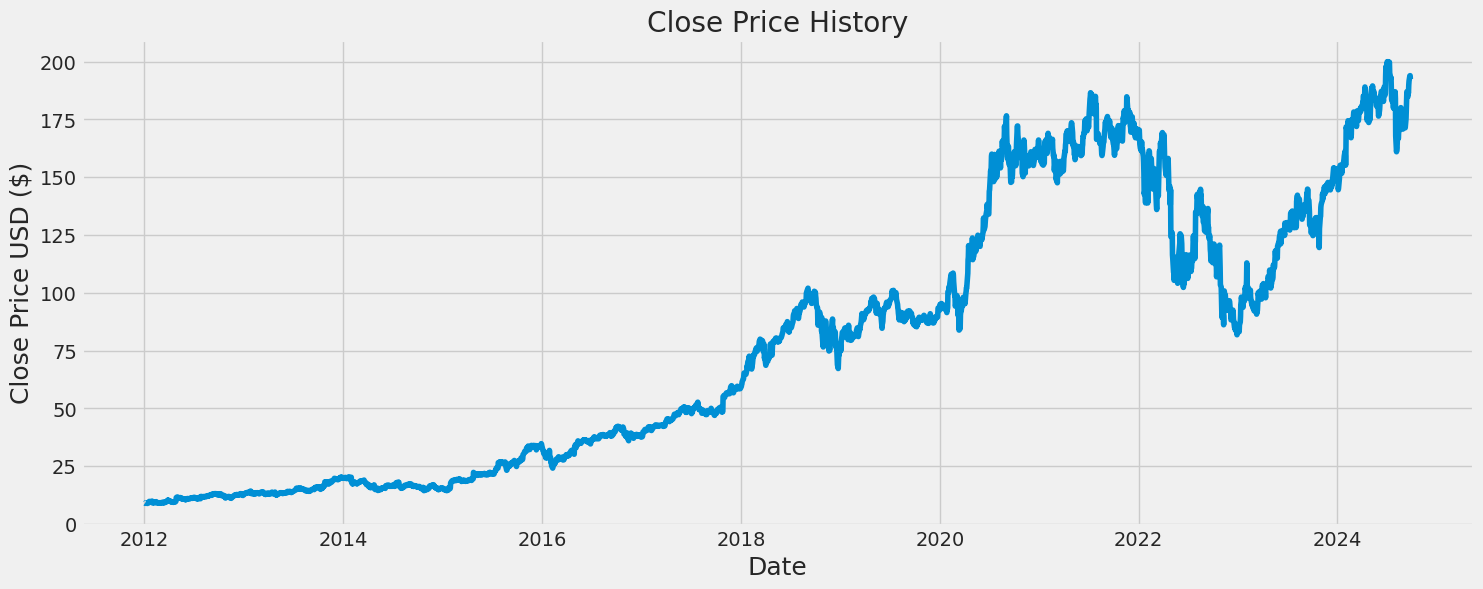

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3043

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.10653221e-04],
       [4.13169840e-04],
       [4.39320587e-04],
       ...,
       [9.67992243e-01],
       [9.68410655e-01],
       [9.60931671e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Rwheshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00081065, 0.00041317, 0.00043932, 0.00174683, 0.00068775,
       0.00089172, 0.00077666, 0.        , 0.00065114, 0.0014984 ,
       0.00353288, 0.00484301, 0.00392252, 0.00265685, 0.00289482,
       0.00310402, 0.00454751, 0.00508359, 0.00424155, 0.00484039,
       0.0009231 , 0.00151409, 0.00307264, 0.00188542, 0.00216   ,
       0.00249734, 0.00236659, 0.00251303, 0.00409511, 0.00401927,
       0.00223322, 0.001046  , 0.00171806, 0.0016553 , 0.00121598,
       0.00077404, 0.0008368 , 0.0006799 , 0.00205801, 0.00098324,
       0.00107477, 0.00088126, 0.0011323 , 0.00134934, 0.00205017,
       0.00306218, 0.00219399, 0.0019508 , 0.0022646 , 0.0016553 ,
       0.00222276, 0.00238489, 0.0025078 , 0.00428862, 0.00413172,
       0.00430693, 0.00499729, 0.00704485, 0.00771691, 0.00659768])]
[0.007499862799602061]

[array([0.00081065, 0.00041317, 0.00043932, 0.00174683, 0.00068775,
       0.00089172, 0.00077666, 0.        , 0.00065114, 0.0014984 ,
       0.00353288, 0.00484301, 0.0

In [ ]:
x_train.shape

(2983, 60, 1)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
num_epochs = 1
batch_size = 50
learning_rate = 0.001

# Convert training data to torch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(x_train_tensor.device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(train_loader):
        outputs = model(x_batch)
        y_batch = y_batch.view(-1, 1)  # Reshape y_batch to match the shape of outputs
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Convert testing data to torch tensors
x_test_tensor = torch.from_numpy(x_test).float()

# Get the model's predicted price values
model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).cpu().numpy()

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

7.363118228047731

<ipython-input-97-24bab43a0eec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


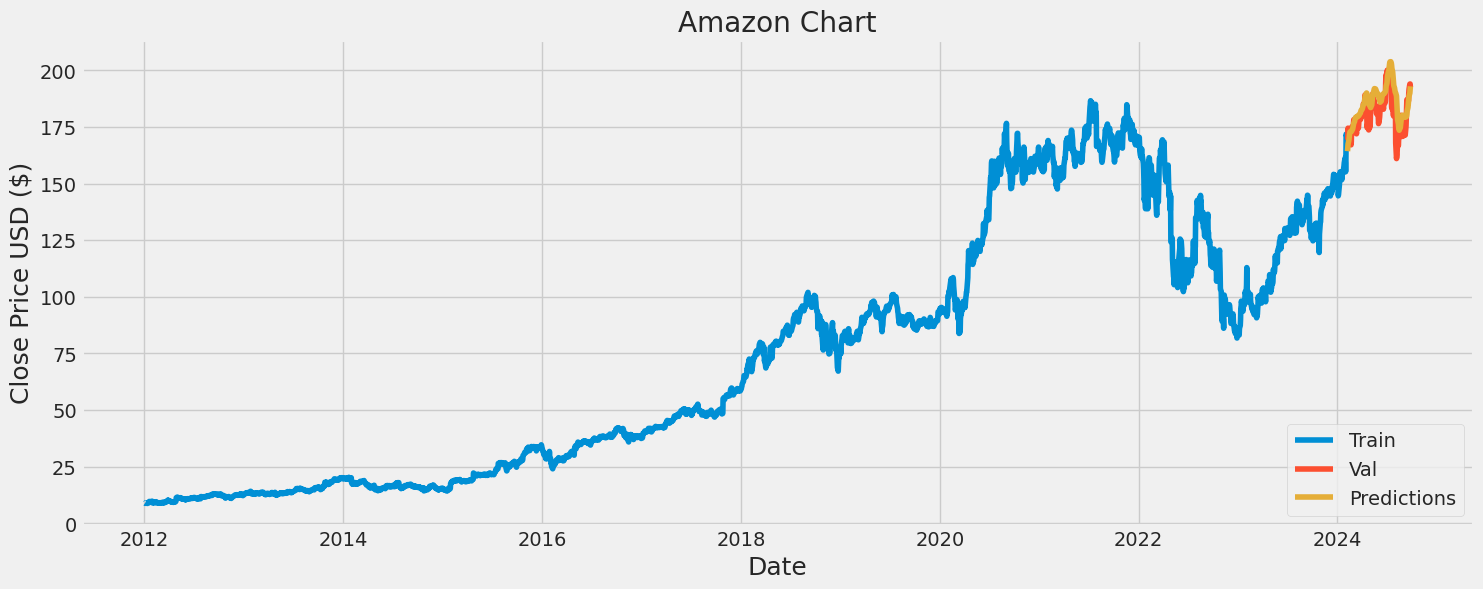

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Amazon Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2024-02-07  170.529999   164.285736
2024-02-08  169.839996   165.959976
2024-02-09  174.449997   167.450653
2024-02-12  172.339996   169.074844
2024-02-13  168.639999   170.509338
...                ...          ...
2024-09-19  189.869995   187.324997
2024-09-20  191.600006   188.577988
2024-09-23  193.880005   189.930969
2024-09-24  193.960007   191.425171
2024-09-25  192.529999   192.905991

[160 rows x 2 columns]

## MICROSOFT

In [ ]:
# Get the stock quote
df = yf.download('MSFT', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   26.549999   26.959999   26.389999   26.770000   21.162374   
2012-01-04   26.820000   27.469999   26.780001   27.400000   21.660400   
2012-01-05   27.379999   27.730000   27.290001   27.680000   21.881752   
2012-01-06   27.530001   28.190001   27.530001   28.110001   22.221674   
2012-01-09   28.049999   28.100000   27.719999   27.740000   21.929184   
...                ...         ...         ...         ...         ...   
2024-09-19  441.230011  441.500000  436.899994  438.690002  438.690002   
2024-09-20  437.220001  439.239990  434.220001  435.269989  435.269989   
2024-09-23  434.279999  436.459991  430.390015  433.510010  433.510010   
2024-09-24  433.000000  433.350006  426.100006  429.170013  429.170013   
2024-09-25  429.829987  433.118988  428.600006  432.109985  432.109985   

              Volume  
Date                  
2012-01-03  64731500  
2012-01-04  80516100  
2012-01-05  56081400  
2012-01-06  99455500  
2012-01-09  59706800  
...              ...  
2024-09-19  21706600  
2024-09-20  55167100  
2024-09-23  15128900  
2024-09-24  17015800  
2024-09-25  13113254  

[3203 rows x 6 columns]

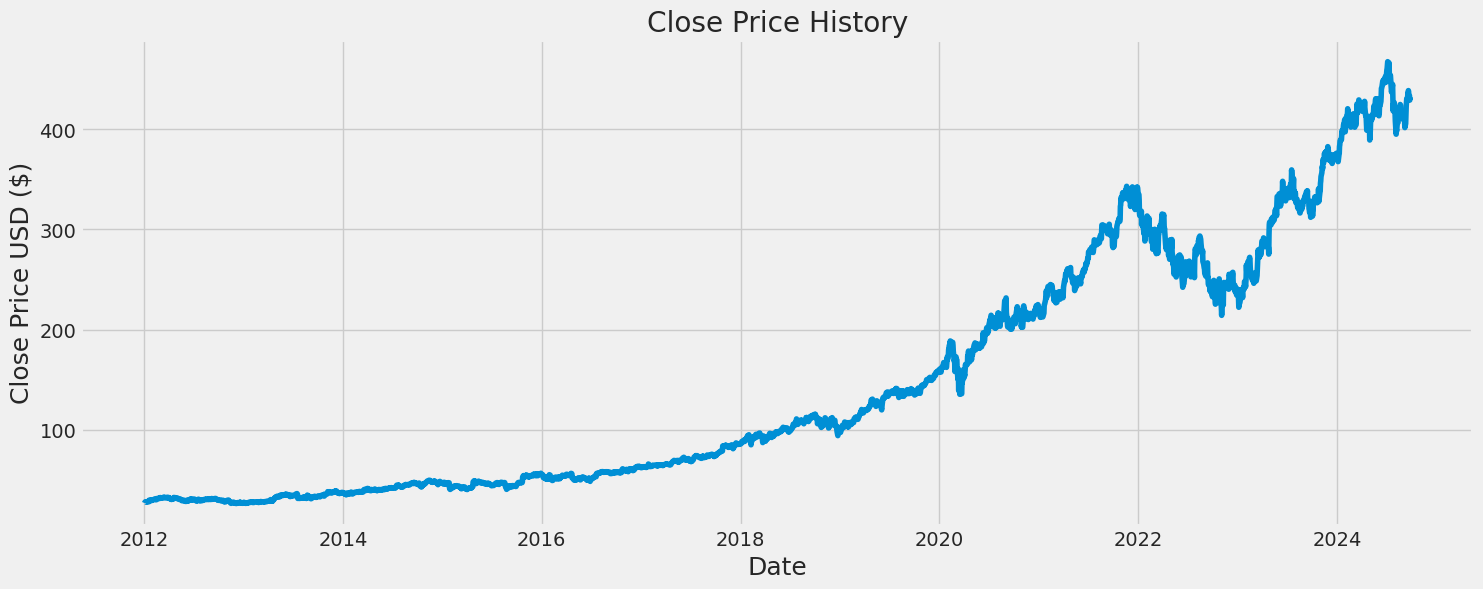

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3043

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[9.06638005e-04],
       [2.33459232e-03],
       [2.96924109e-03],
       ...,
       [9.22822394e-01],
       [9.12985370e-01],
       [9.19649102e-01]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Rwheshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.00757043, 0.00761576, 0.00673179,
       0.00723044, 0.00709445, 0.00648246, 0.00734377, 0.00716245,
       0.00797842, 0.00811442, 0.00877173, 0.00868107, 0.00902106,
       0.0097237 , 0.00997303, 0.00936104, 0.00954237, 0.0087944 ,
       0.00834107, 0.01115166, 0.01106099, 0.01149165, 0.01110633,
       0.01133299, 0.01158231, 0.01128765, 0.01246628, 0.01217162,
       0.01341826, 0.01294227, 0.01230762, 0.01176364, 0.01239828,
       0.0127836 , 0.01273827, 0.01285161, 0.01427956, 0.01450622,
       0.01468754, 0.0141209 , 0.01321426, 0.01273827, 0.01255695,
       0.01276094, 0.0127836 , 0.01409823, 0.01393957, 0.01319159])]
[0.013032929430421614]

[array([0.00090664, 0.00233459, 0.00296924, 0.00394388, 0.00310524,
       0.0033319 , 0.0030599 , 0.00369455, 0.0042612 , 0.00428387,
       0.00421587, 0.00396655, 0.0

In [ ]:
x_train.shape

(2983, 60, 1)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
num_epochs = 1
batch_size = 50
learning_rate = 0.001

# Convert training data to torch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(x_train_tensor.device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(train_loader):
        outputs = model(x_batch)
        y_batch = y_batch.view(-1, 1)  # Reshape y_batch to match the shape of outputs
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Convert testing data to torch tensors
x_test_tensor = torch.from_numpy(x_test).float()

# Get the model's predicted price values
model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).cpu().numpy()

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

11.643522724951035

<ipython-input-106-ab322e5e0e7d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


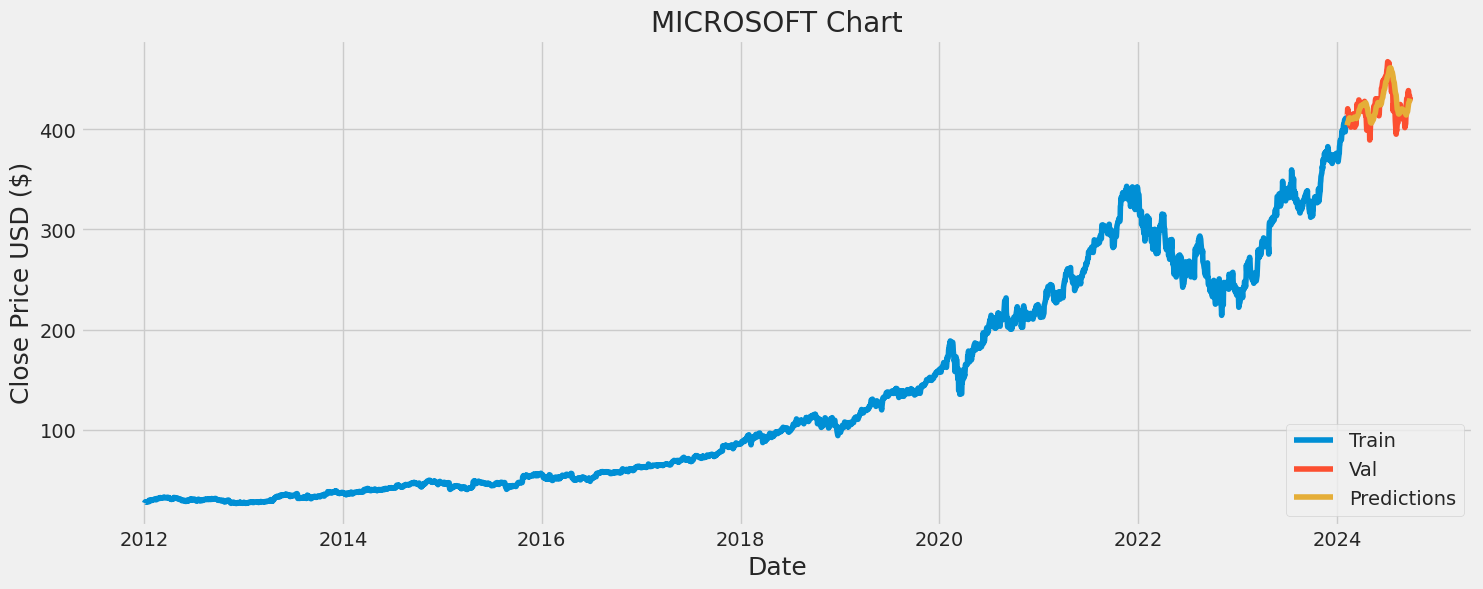

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('MICROSOFT Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2024-02-07  414.049988   404.037384
2024-02-08  414.109985   405.297913
2024-02-09  420.549988   406.679443
2024-02-12  415.260010   408.461212
2024-02-13  406.320007   410.004486
...                ...          ...
2024-09-19  438.690002   424.003540
2024-09-20  435.269989   426.193329
2024-09-23  433.510010   428.143524
2024-09-24  429.170013   429.747009
2024-09-25  432.109985   430.794098

[160 rows x 2 columns]

## GOOGLE

In [ ]:
# Get the stock quote
df = yf.download('GOOG', start='2012-01-01', end=datetime.now())
# Show the data
df

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Date                                                                     
2012-01-03   16.262545   16.641375   16.248346   16.573130   16.532528   
2012-01-04   16.563665   16.693678   16.453827   16.644611   16.603836   
2012-01-05   16.491436   16.537264   16.344486   16.413727   16.373516   
2012-01-06   16.417213   16.438385   16.184088   16.189817   16.150156   
2012-01-09   16.102144   16.114599   15.472754   15.503389   15.465409   
...                ...         ...         ...         ...         ...   
2024-09-19  164.820007  164.990005  162.522003  163.240005  163.240005   
2024-09-20  164.520004  164.750000  163.179993  164.639999  164.639999   
2024-09-23  165.339996  166.610001  162.949997  163.070007  163.070007   
2024-09-24  164.250000  164.550003  162.029999  163.639999  163.639999   
2024-09-25  162.970001  164.216995  162.774994  162.990005  162.990005   

               Volume  
Date                   
2012-01-03  147611217  
2012-01-04  114989399  
2012-01-05  131808205  
2012-01-06  108119746  
2012-01-09  233776981  
...               ...  
2024-09-19   17548200  
2024-09-20   46362700  
2024-09-23   15648400  
2024-09-24   18774100  
2024-09-25   12385691  

[3203 rows x 6 columns]

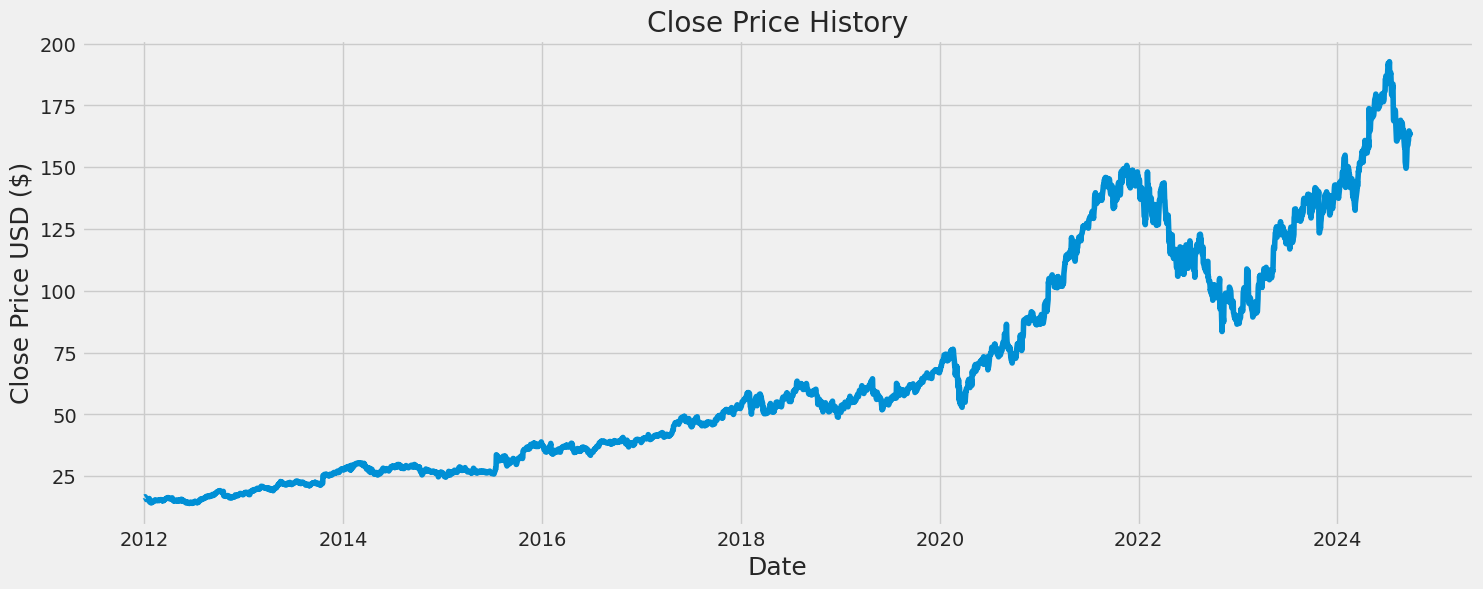

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3043

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01482114],
       [0.01522107],
       [0.01392931],
       ...,
       [0.83444854],
       [0.83763756],
       [0.83400094]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Rwheshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01482114, 0.01522107, 0.01392931, 0.01267657, 0.00883611,
       0.00893087, 0.00932383, 0.00983663, 0.00918866, 0.00968892,
       0.01029231, 0.01122037, 0.00375406, 0.00368856, 0.00304896,
       0.00145481, 0.0012611 , 0.00291657, 0.00259746, 0.00293469,
       0.00303502, 0.00363143, 0.00519493, 0.00697302, 0.00664973,
       0.00707892, 0.00730327, 0.00652989, 0.00740639, 0.00706638,
       0.00648111, 0.00661489, 0.00635291, 0.00765722, 0.00681276,
       0.00655776, 0.00708589, 0.00700367, 0.00826896, 0.00824945,
       0.00882775, 0.0086675 , 0.00769206, 0.0063975 , 0.0066539 ,
       0.00670129, 0.00574118, 0.00642398, 0.00818395, 0.00793453,
       0.00865078, 0.00919563, 0.01044141, 0.01037313, 0.0112775 ,
       0.01212335, 0.01164121, 0.01258041, 0.01225852, 0.01347643])]
[0.012452215025281807]

[array([0.01482114, 0.01522107, 0.01392931, 0.01267657, 0.00883611,
       0.00893087, 0.00932383, 0.00983663, 0.00918866, 0.00968892,
       0.01029231, 0.01122037, 0.0

In [ ]:
x_train.shape

(2983, 60, 1)

In [ ]:
import torch
import torch.nn as nn
import numpy as np

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
input_size = 1
hidden_size = 128
num_layers = 2
output_size = 1
num_epochs = 1
batch_size = 50
learning_rate = 0.001

# Convert training data to torch tensors
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

# Create DataLoader
train_dataset = torch.utils.data.TensorDataset(x_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model, loss function and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, output_size).to(x_train_tensor.device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    for i, (x_batch, y_batch) in enumerate(train_loader):
        outputs = model(x_batch)
        y_batch = y_batch.view(-1, 1)  # Reshape y_batch to match the shape of outputs
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Convert testing data to torch tensors
x_test_tensor = torch.from_numpy(x_test).float()

# Get the model's predicted price values
model.eval()
with torch.no_grad():
    predictions = model(x_test_tensor).cpu().numpy()

# Inverse transform the predictions
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

8.524551313734989

<ipython-input-133-b583d93dfc6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


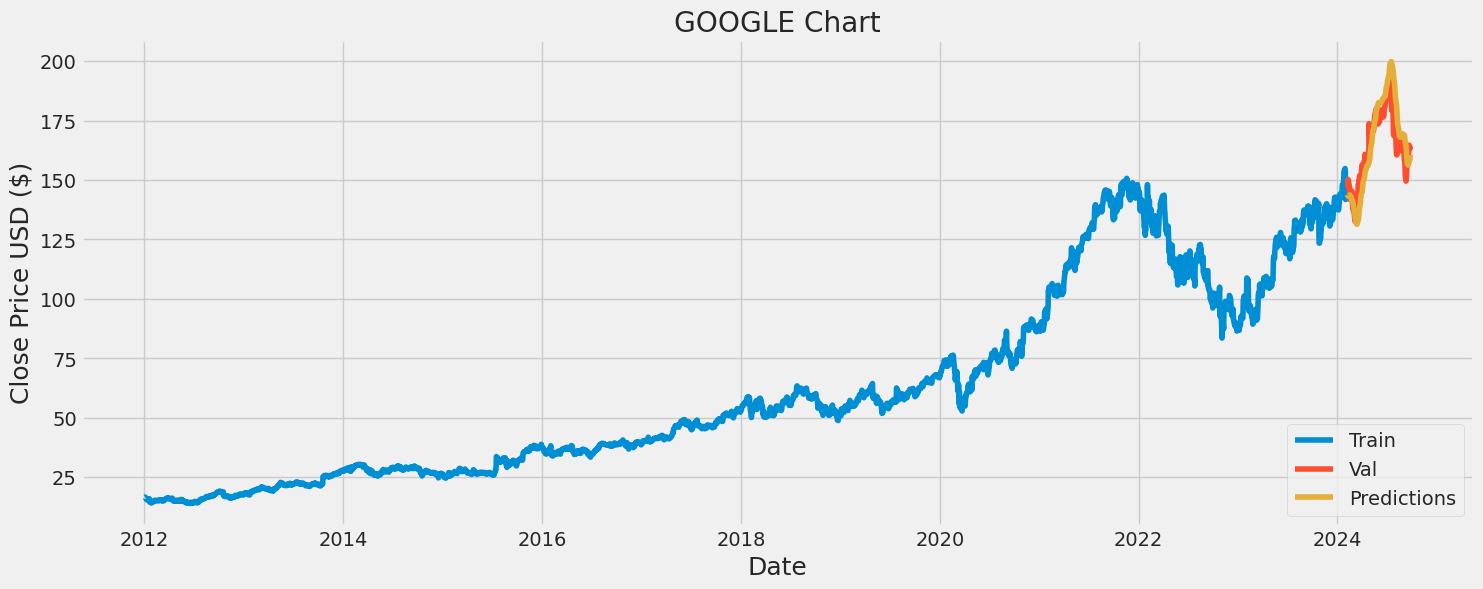

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('GOOGLE Chart')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

Close  Predictions
Date                               
2024-02-07  146.679993   143.788971
2024-02-08  147.220001   143.398788
2024-02-09  150.220001   143.198303
2024-02-12  148.729996   143.358917
2024-02-13  146.369995   143.605286
...                ...          ...
2024-09-19  163.240005   156.857864
2024-09-20  164.639999   157.609573
2024-09-23  163.070007   158.608948
2024-09-24  163.639999   159.567444
2024-09-25  162.990005   160.485931

[160 rows x 2 columns]

# Result
In this notebook, we discovered and explored stock data.

It's clearly evident that LSTM outperforms all other models like Fbprophet and Auto arima because of it's ability to remember long term dependencies.